In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import scipy.stats as stats

from scipy.stats.stats import pearsonr
from matplotlib import style
from cycler import cycler
from collections import defaultdict

style.use("seaborn-pastel")
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.grid'] = True


plt.rc('axes', prop_cycle=(cycler('color', ['#d32f2f', '#388E3C', '#304ffe', '#ffab00', '#5d4037', '#aa00ff', '#00bfa5', '#455a64'])))
plt.rcParams['axes.prop_cycle']


'#d32f2f'
'#388E3C'
'#304ffe'
'#ffab00'
'#5d4037'
'#aa00ff'
'#00bfa5'
'#455a64'


Load dataset
===============

In [2]:
cc = pd.read_csv("../dataset/credit_default_train.csv")
cc.head()

,limit,sex,education,status,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,...,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,credit_default
0,50000,male,graduate school,NaN,25,2,0,0,0,0,...,49535,30358,30302,2130,1905,1811,1100,1100,1200,no
1,200000,male,university,married,54,-1,-1,-1,-1,-1,...,6335,4616,7956,10120,7852,6336,4622,7956,5499,no
2,30000,female,high school,married,-1,2,3,2,2,2,...,30496,29731,29047,0,1700,1100,3,1053,1303,no
3,140000,female,university,single,-1,0,0,0,0,0,...,25224,26855,23783,2000,2000,900,2000,10000,5000,no
4,60000,female,high school,married,36,1,2,2,0,0,...,48738,49601,52773,1788,0,1894,1801,3997,0,yes


In [3]:
cc.shape[0]

10000

In [4]:
cc.describe()

,limit,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,ps-apr,ba-sep,ba-aug,ba-jul,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,167197.000000,32.020200,-0.004000,-0.127800,-0.175700,-0.234300,-0.263700,-0.297400,51490.704100,49239.438400,46957.46680,43306.114300,40182.130200,38621.582700,5651.344900,5.973676e+03,5131.898600,4719.769200,4734.702900,5480.147400
std,128975.488596,13.843119,1.132834,1.200921,1.193554,1.169333,1.147386,1.147295,73740.383345,70777.470286,68948.62697,64519.910263,60732.330157,59325.339137,15835.839092,2.251175e+04,15416.402957,14483.407778,14912.375475,19361.411204
min,10000.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,-69777.000000,-61506.00000,-24303.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,26.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3545.250000,2899.250000,2442.50000,2203.250000,1650.000000,1150.000000,997.000000,7.800000e+02,390.000000,261.500000,200.000000,100.000000
50%,140000.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22246.000000,21202.000000,19905.50000,19072.000000,18071.000000,16977.000000,2081.500000,2.000000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67681.000000,64412.750000,60164.75000,54093.750000,49906.500000,48680.750000,5019.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000
max,780000.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,613860.000000,605943.000000,597415.00000,616836.000000,587067.000000,568638.000000,493358.000000,1.227082e+06,417588.000000,292962.000000,417990.000000,528666.000000


In [5]:
cc.isnull().sum()

limit                0
sex                100
education          127
status            1822
age                  0
ps-sep               0
ps-aug               0
ps-jul               0
ps-jun               0
ps-may               0
ps-apr               0
ba-sep               0
ba-aug               0
ba-jul               0
ba-jun               0
ba-may               0
ba-apr               0
pa-sep               0
pa-aug               0
pa-jul               0
pa-jun               0
pa-may               0
pa-apr               0
credit_default       0
dtype: int64

Data understanding
===============

Credit default
--------------------

In [6]:
cc['credit_default'].value_counts()

no     7788
yes    2212
Name: credit_default, dtype: int64

In [7]:
cc['credit_default'].unique()

array(['no', 'yes'], dtype=object)

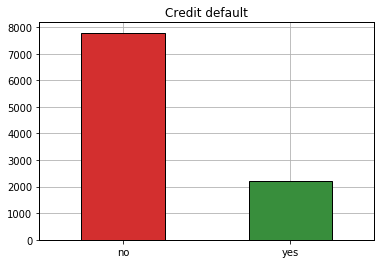

In [8]:
cc['credit_default'].value_counts().plot(kind='bar', title='Credit default', edgecolor='black')
#plt.ylabel('credit default')
plt.xticks(rotation=0)
plt.show()

Sex
--------

In [9]:
cc['sex'].describe()

count       9900
unique         2
top       female
freq        6032
Name: sex, dtype: object

In [10]:
cc['sex'].value_counts()

female    6032
male      3868
Name: sex, dtype: int64

In [11]:
cc['sex'].unique()

array(['male', 'female', nan], dtype=object)

In [12]:
cc.isnull().sum()['sex']

100

In [13]:
#cc['sex'] = cc['sex'].fillna('nan')

In [14]:
sex_default = pd.crosstab(cc['sex'], cc['credit_default'])
sex_default

credit_default,no,yes
sex,,
female,4803,1229
male,2904,964


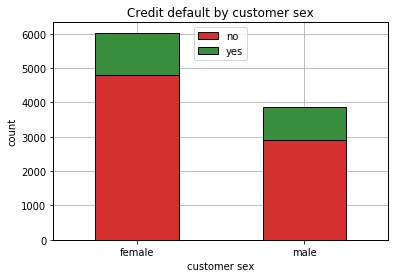

In [15]:
sex_default.plot(kind='bar', stacked=True, title='Credit default by customer sex', edgecolor='black')
plt.xlabel('customer sex')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.legend(loc="upper center")
plt.show()

In [16]:
sex_default_norm = sex_default.div(sex_default.sum(1).astype(float), axis=0)
sex_default_norm

credit_default,no,yes
sex,,
female,0.796253,0.203747
male,0.750776,0.249224


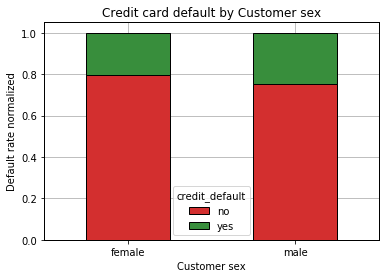

In [17]:
sex_default_norm.plot(kind='bar', stacked=True, title='Credit card default by Customer sex', edgecolor='black')
plt.xlabel('Customer sex')
plt.ylabel('Default rate normalized')
plt.xticks(rotation=0)
plt.show()

Education
--------

In [18]:
cc['education'].describe()

count           9873
unique             4
top       university
freq            4685
Name: education, dtype: object

In [19]:
cc['education'].value_counts()

university         4685
graduate school    3480
high school        1672
others               36
Name: education, dtype: int64

In [20]:
cc.isnull().sum()['education']

127

In [21]:
#cc['education'] = cc['education'].fillna('nan')

In [22]:
education_default = pd.crosstab(cc['education'], cc['credit_default'])
education_default

credit_default,no,yes
education,,
graduate school,2813,667
high school,1286,386
others,34,2
university,3534,1151


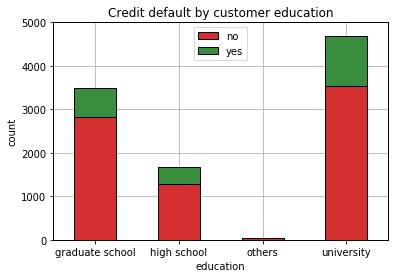

In [23]:
education_default.plot(kind='bar', stacked=True, title='Credit default by customer education', edgecolor='black')
plt.xlabel('education')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.legend(loc="upper center")
plt.ylim(top=5000)
plt.show()

In [24]:
education_default_norm = education_default.div(education_default.sum(1).astype(float), axis=0)
education_default_norm

credit_default,no,yes
education,,
graduate school,0.808333,0.191667
high school,0.769139,0.230861
others,0.944444,0.055556
university,0.754322,0.245678


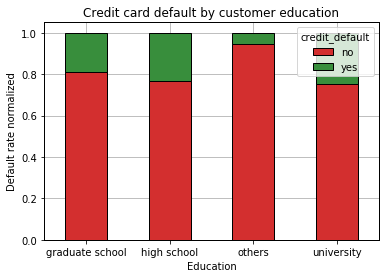

In [25]:
education_default_norm.plot(kind='bar', stacked=True, title='Credit card default by customer education', edgecolor='black')
plt.xlabel('Education')
plt.ylabel('Default rate normalized')
plt.xticks(rotation=0)
plt.show()

Status
--------

In [26]:
cc['status'].describe()

count       8178
unique         3
top       single
freq        4346
Name: status, dtype: object

In [27]:
cc['status'].value_counts()

single     4346
married    3757
others       75
Name: status, dtype: int64

In [28]:
cc.isnull().sum()['status']

1822

In [29]:
#cc['status'] = cc['status'].fillna('nan')

In [30]:
status_default = pd.crosstab(cc['status'], cc['credit_default'])
status_default

credit_default,no,yes
status,,
married,2888,869
others,50,25
single,3458,888


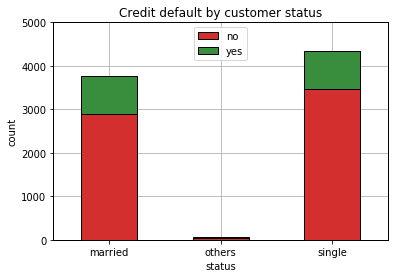

In [31]:
status_default.plot(kind='bar', stacked=True, title='Credit default by customer status', edgecolor='black')
plt.xlabel('status')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.legend(loc="upper center")
plt.ylim(top=5000)
plt.show()

In [32]:
status_default_norm = status_default.div(status_default.sum(1).astype(float), axis=0)
status_default_norm

credit_default,no,yes
status,,
married,0.768698,0.231302
others,0.666667,0.333333
single,0.795674,0.204326


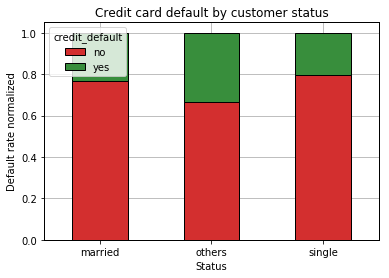

In [33]:
status_default_norm.plot(kind='bar', stacked=True, title='Credit card default by customer status', edgecolor='black')
plt.xlabel('Status')
plt.ylabel('Default rate normalized')
plt.xticks(rotation=0)
plt.show()

Age
--------

In [34]:
ages = cc['age'].copy()
ages.describe()

count    10000.000000
mean        32.020200
std         13.843119
min         -1.000000
25%         26.000000
50%         33.000000
75%         40.000000
max         75.000000
Name: age, dtype: float64

In [35]:
ages_unique = ages.unique()
ages_unique.sort()
ages_unique

array([-1, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 75])

In [36]:
len(ages_unique)

55

In [37]:
cc[cc['age']==-1]['age'].size

951

In [38]:
ages_valid = cc[cc['age']>0]
ages_valid['age'].size

9049

In [39]:
ages_valid['age'].describe()
ages_valid['age'].median()

34.0

In [40]:
#ages_valid = cc
#ages_valid['age'] = ages_valid['age'].apply(lambda x: 0 if x == -1 else x)
ages_valid.head()

,limit,sex,education,status,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,...,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,credit_default
0,50000,male,graduate school,NaN,25,2,0,0,0,0,...,49535,30358,30302,2130,1905,1811,1100,1100,1200,no
1,200000,male,university,married,54,-1,-1,-1,-1,-1,...,6335,4616,7956,10120,7852,6336,4622,7956,5499,no
4,60000,female,high school,married,36,1,2,2,0,0,...,48738,49601,52773,1788,0,1894,1801,3997,0,yes
5,260000,female,university,married,44,1,-1,-1,-1,-1,...,1698,0,5062,1106,2527,1698,0,5062,0,no
6,50000,female,graduate school,single,29,3,3,2,3,2,...,49104,51044,50933,0,2800,0,3000,800,3000,yes


In [41]:
ages_default = pd.crosstab(ages_valid['age']//5*5, ages_valid['credit_default'])
ages_default

credit_default,no,yes
age,,
20,562,234
25,1664,445
30,1491,332
35,1233,323
40,934,257
45,585,175
50,363,136
55,165,48
60,43,22


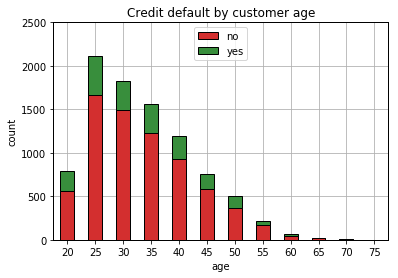

In [42]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ages_default.plot(ax=ax1, kind='bar', stacked=True, title='Credit default by customer age', edgecolor='black', )

#ax2 = fig.add_subplot(111)

#from scipy.stats import norm

# Plot between -10 and 10 with .001 steps.
#x_axis = np.arange(20, 75, 0.001)
# Mean = 0, SD = 2.
#ax2.plot(x_axis, norm.pdf(x_axis,35.5,9), zorder=2)

plt.xlabel('age')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.ylim(top=2500)
plt.legend(loc="upper center")
plt.show()


In [43]:
ages_default_norm = ages_default.div(ages_default.sum(1).astype(float), axis=0)
ages_default_norm

credit_default,no,yes
age,,
20,0.706030,0.293970
25,0.789000,0.211000
30,0.817883,0.182117
35,0.792416,0.207584
40,0.784215,0.215785
45,0.769737,0.230263
50,0.727455,0.272545
55,0.774648,0.225352
60,0.661538,0.338462


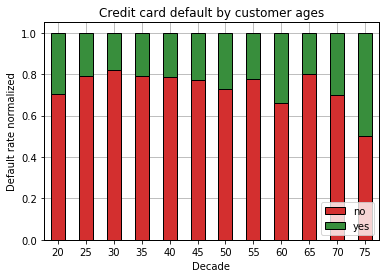

In [44]:
ages_default_norm.plot(kind='bar', stacked=True, title='Credit card default by customer ages', edgecolor='black')
plt.xlabel('Decade')
plt.ylabel('Default rate normalized')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

Limit
--------

In [45]:
limits = cc['limit'].copy()
limits.describe()

count     10000.000000
mean     167197.000000
std      128975.488596
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      780000.000000
Name: limit, dtype: float64

In [46]:
limits_unique = limits.unique()
limits_unique.sort()
limits_unique

array([ 10000,  20000,  30000,  40000,  50000,  60000,  70000,  80000,
        90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000,
       170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000,
       250000, 260000, 270000, 280000, 290000, 300000, 310000, 320000,
       330000, 340000, 350000, 360000, 370000, 380000, 390000, 400000,
       410000, 420000, 430000, 440000, 450000, 460000, 470000, 480000,
       490000, 500000, 510000, 520000, 530000, 540000, 550000, 560000,
       570000, 580000, 590000, 600000, 610000, 620000, 630000, 640000,
       650000, 660000, 680000, 700000, 710000, 740000, 750000, 780000])

In [47]:
len(limits_unique)

72

In [48]:
limits_default = pd.crosstab(cc['limit']//50000*50000, cc['credit_default'])
limits_default

credit_default,no,yes
limit,,
0,878,545
50000,1754,633
100000,1014,289
150000,969,211
200000,1126,236
250000,571,89
300000,434,56
350000,426,75
400000,210,30


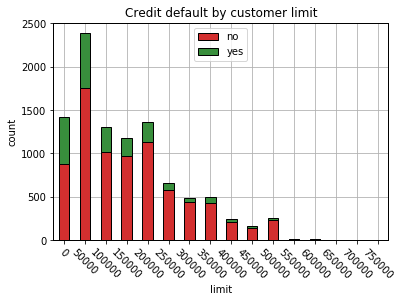

In [49]:
limits_default.plot(kind='bar', stacked=True, title='Credit default by customer limit', edgecolor='black')
plt.xlabel('limit')
plt.ylabel('count')
plt.xticks(rotation=-45)
plt.legend(loc="upper center")
plt.show()

In [50]:
limits_default_norm = limits_default.div(limits_default.sum(1).astype(float), axis=0)
limits_default_norm

credit_default,no,yes
limit,,
0,0.617006,0.382994
50000,0.734814,0.265186
100000,0.778204,0.221796
150000,0.821186,0.178814
200000,0.826725,0.173275
250000,0.865152,0.134848
300000,0.885714,0.114286
350000,0.850299,0.149701
400000,0.875000,0.125000


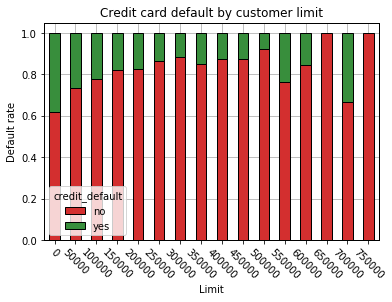

In [51]:
limits_default_norm.plot(kind='bar', stacked=True, title='Credit card default by customer limit', edgecolor='black')
plt.xlabel('Limit')
plt.ylabel('Default rate')
plt.xticks(rotation=-45)
plt.show()

Payment status
--------

In [52]:
ps_var = ['ps-apr', 'ps-may', 'ps-jun', 'ps-jul', 'ps-aug', 'ps-sep']
cc[ps_var].describe()

,ps-apr,ps-may,ps-jun,ps-jul,ps-aug,ps-sep
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.297400,-0.263700,-0.234300,-0.175700,-0.127800,-0.004000
std,1.147295,1.147386,1.169333,1.193554,1.200921,1.132834
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000


In [53]:
ps_unique = []
for m in ps_var:
    val = cc[m].unique()
    val.sort()
    ps_unique.append(val)
ps_unique

[array([-2, -1,  0,  2,  3,  4,  5,  6,  7,  8]),
 array([-2, -1,  0,  2,  3,  4,  5,  6,  7,  8]),
 array([-2, -1,  0,  2,  3,  4,  5,  6,  7,  8]),
 array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8]),
 array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7]),
 array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8])]

In [54]:
cc[ps_var[0]].value_counts()

 0    5450
-1    1915
-2    1636
 2     900
 3      57
 7      19
 4      14
 6       5
 5       3
 8       1
Name: ps-apr, dtype: int64

In [55]:
ps_default = []

for m in ps_var:
    ps_default.append(pd.crosstab(cc[m], cc['credit_default']))

for i in range(0, len(ps_default)):    
    ps_default[i] = ps_default[i].reindex(list(range(-2, 9)), fill_value=0)

ps_default[5]

credit_default,no,yes
ps-sep,,
-2,811,106
-1,1561,313
0,4263,615
1,818,436
2,292,627
3,26,85
4,6,17
5,4,7
6,3,0


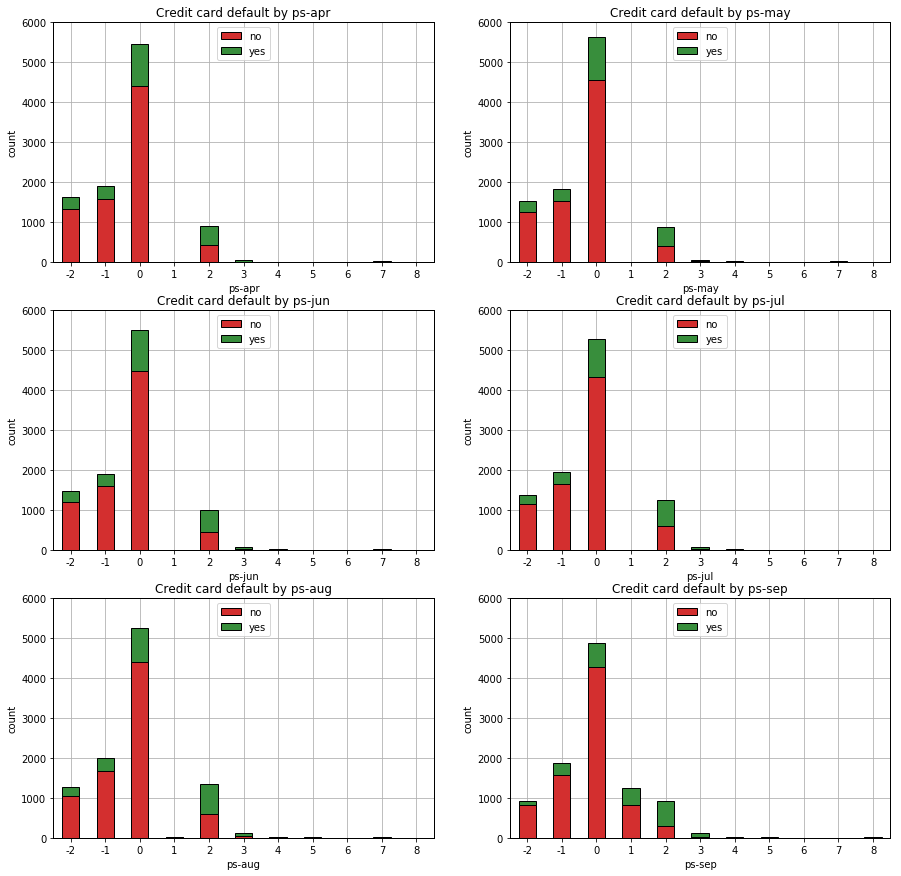

In [56]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

for i in range(0, len(ps_var)):
    x = i // fig_dims[1]
    y = i % fig_dims[1]
    sp = plt.subplot2grid(fig_dims, (x, y))
    ps_default[i].plot(ax=sp, kind='bar', stacked=True, title='Credit card default by ' + ps_var[i], edgecolor='black')
    plt.ylim(top=6000)
    plt.ylabel("count")
    plt.legend(loc="upper center")
    plt.xticks(rotation=0)
    
plt.show()

In [57]:
ps_default_norm = []

for i in range(0, len(ps_var)):
    ps_default_norm.append(ps_default[i].div(ps_default[i].sum(1).astype(float), axis=0) )
    
ps_default_norm[0]

credit_default,no,yes
ps-apr,,
-2,0.808680,0.191320
-1,0.826632,0.173368
0,0.811193,0.188807
1,NaN,NaN
2,0.485556,0.514444
3,0.280702,0.719298
4,0.214286,0.785714
5,0.333333,0.666667
6,0.000000,1.000000


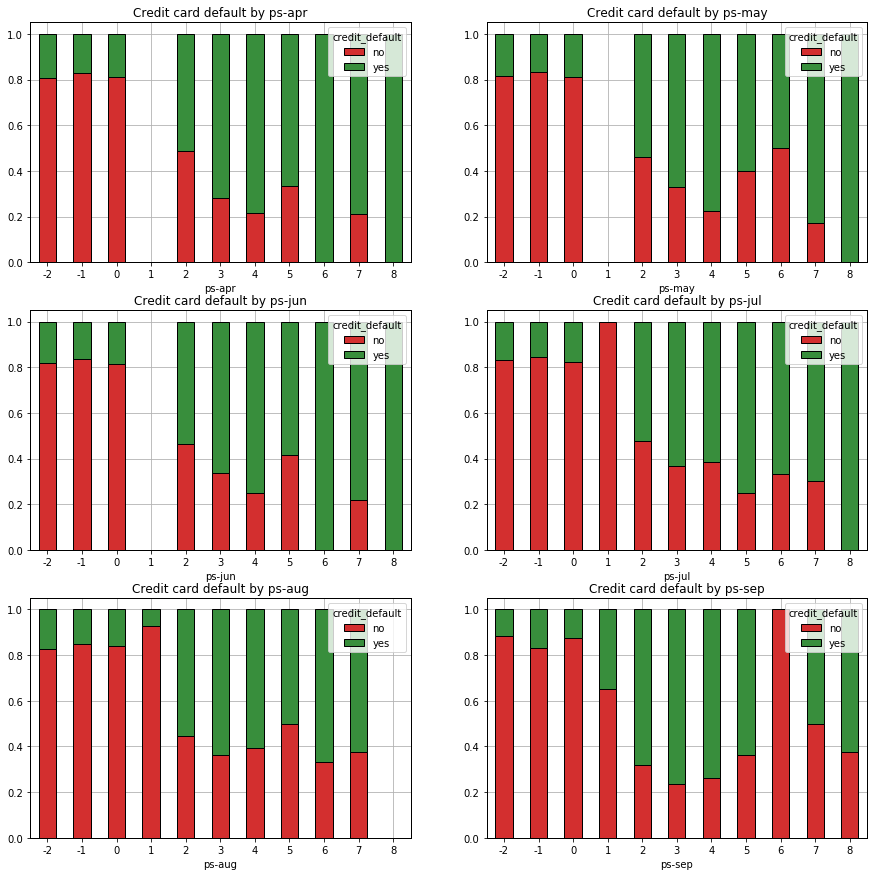

In [58]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

for i in range(0, 6):#len(ps_var)):
    x = i // fig_dims[1]
    y = i % fig_dims[1]
    sp = plt.subplot2grid(fig_dims, (x, y))
    ps_default_norm[i].plot(ax=sp, kind='bar', stacked=True, title='Credit card default by ' + ps_var[i], edgecolor='black')
    plt.xticks(rotation=0)

plt.show()

Bill Amount
--------

In [59]:
ba_var = ['ba-apr', 'ba-may', 'ba-jun', 'ba-jul', 'ba-aug', 'ba-sep']
cc[ba_var].describe()

,ba-apr,ba-may,ba-jun,ba-jul,ba-aug,ba-sep
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,38621.582700,40182.130200,43306.114300,46957.46680,49239.438400,51490.704100
std,59325.339137,60732.330157,64519.910263,68948.62697,70777.470286,73740.383345
min,-209051.000000,-81334.000000,-24303.000000,-61506.00000,-69777.000000,-14386.000000
25%,1150.000000,1650.000000,2203.250000,2442.50000,2899.250000,3545.250000
50%,16977.000000,18071.000000,19072.000000,19905.50000,21202.000000,22246.000000
75%,48680.750000,49906.500000,54093.750000,60164.75000,64412.750000,67681.000000
max,568638.000000,587067.000000,616836.000000,597415.00000,605943.000000,613860.000000


In [60]:
ba_unique = []
for m in ba_var:
    val = cc[m].unique()
    val.sort()
    ba_unique.append([min(val), max(val)])
ba_unique

[[-209051, 568638],
 [-81334, 587067],
 [-24303, 616836],
 [-61506, 597415],
 [-69777, 605943],
 [-14386, 613860]]

In [61]:
cc.isnull().sum()[ba_var]

ba-apr    0
ba-may    0
ba-jun    0
ba-jul    0
ba-aug    0
ba-sep    0
dtype: int64

In [62]:
ba_default = []

for m in ba_var:
    ba_default.append(pd.crosstab(cc[m]//50000*50000, cc['credit_default']))
    
ba_default[0]

credit_default,no,yes
ba-apr,,
-250000,1,0
-200000,1,0
-100000,1,0
-50000,179,43
0,5688,1691
50000,973,248
100000,480,126
150000,247,50
200000,103,22


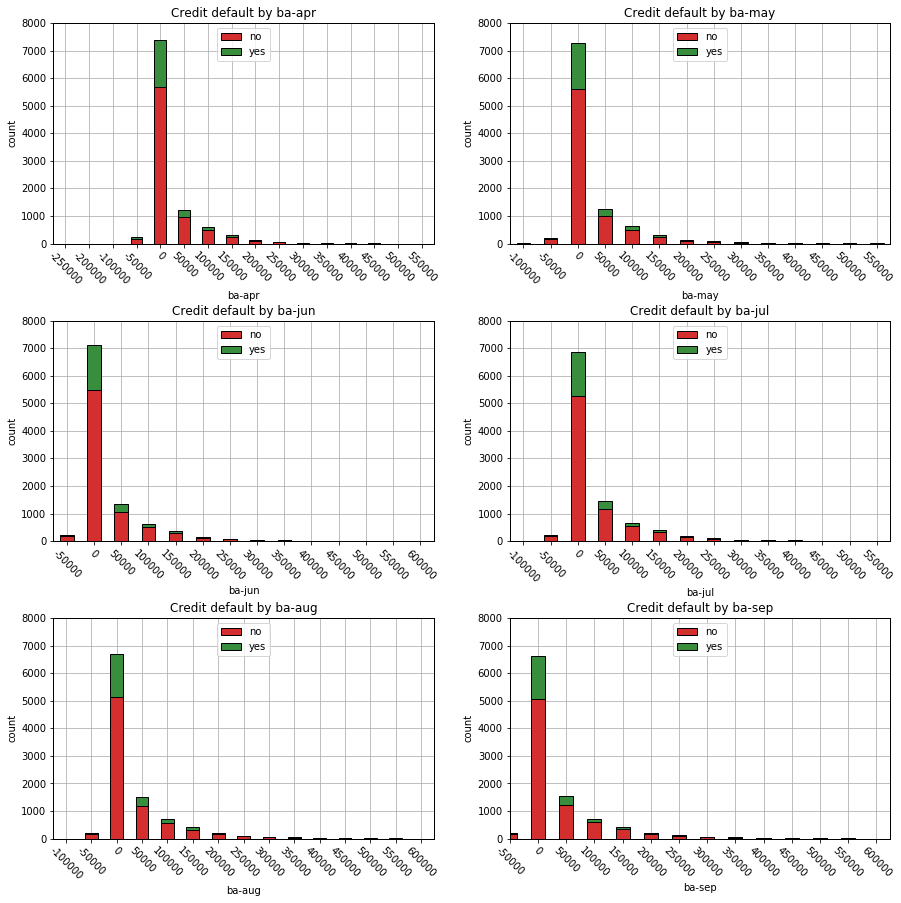

In [63]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

for i in range(0, 6):#len(ba_var)):
    x = i // fig_dims[1]
    y = i % fig_dims[1]
    sp = plt.subplot2grid(fig_dims, (x, y))
    ba_default[i].plot(ax=sp, kind='bar', stacked=True, title='Credit default by ' + ba_var[i], edgecolor='black')
    plt.ylim(top=8000)
    plt.legend(loc="upper center")
    plt.ylabel("count")
    plt.xticks(rotation=-45)
    
plt.xlim(left=0)
plt.subplots_adjust(hspace=0.35)
plt.show()

In [64]:
ba_default_norm = []

for i in range(0, len(ba_var)):
    ba_default_norm.append(ba_default[i].div(ba_default[i].sum(1).astype(float), axis=0) )
    
ba_default_norm[0]

credit_default,no,yes
ba-apr,,
-250000,1.000000,0.000000
-200000,1.000000,0.000000
-100000,1.000000,0.000000
-50000,0.806306,0.193694
0,0.770836,0.229164
50000,0.796888,0.203112
100000,0.792079,0.207921
150000,0.831650,0.168350
200000,0.824000,0.176000


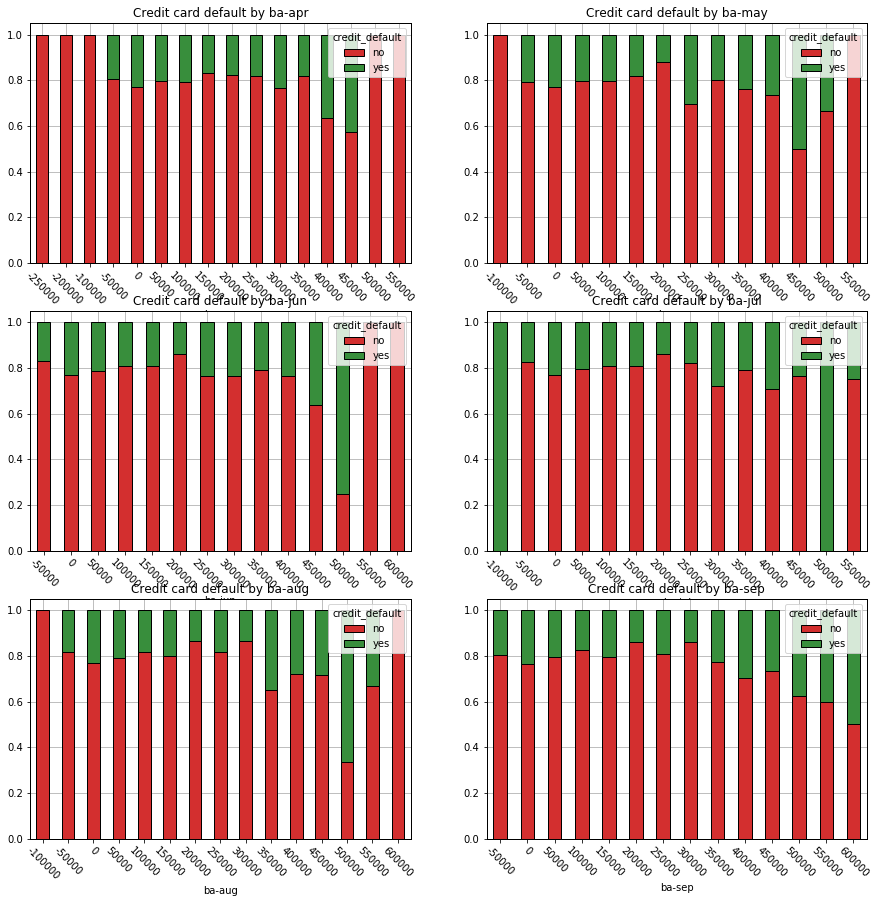

In [65]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

for i in range(0, len(ba_var)):
    x = i // fig_dims[1]
    y = i % fig_dims[1]
    sp = plt.subplot2grid(fig_dims, (x, y))
    ba_default_norm[i].plot(ax=sp, kind='bar', stacked=True, title='Credit card default by ' + ba_var[i], edgecolor='black')
    plt.xticks(rotation=-45)
    
plt.show()

Payment Amount
--------

In [66]:
pa_var = ['pa-apr', 'pa-may', 'pa-jun', 'pa-jul', 'pa-aug', 'pa-sep']
cc[pa_var].describe()

,pa-apr,pa-may,pa-jun,pa-jul,pa-aug,pa-sep
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,5480.147400,4734.702900,4719.769200,5131.898600,5.973676e+03,5651.344900
std,19361.411204,14912.375475,14483.407778,15416.402957,2.251175e+04,15835.839092
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,100.000000,200.000000,261.500000,390.000000,7.800000e+02,997.000000
50%,1500.000000,1500.000000,1500.000000,1800.000000,2.000000e+03,2081.500000
75%,4000.000000,4000.000000,4000.000000,4500.000000,5.000000e+03,5019.000000
max,528666.000000,417990.000000,292962.000000,417588.000000,1.227082e+06,493358.000000


In [67]:
pa_unique = []
for m in pa_var:
    val = cc[m].unique()
    val.sort()
    pa_unique.append([min(val), max(val)])
pa_unique

[[0, 528666], [0, 417990], [0, 292962], [0, 417588], [0, 1227082], [0, 493358]]

In [68]:
cc.isnull().sum()[pa_var]

pa-apr    0
pa-may    0
pa-jun    0
pa-jul    0
pa-aug    0
pa-sep    0
dtype: int64

In [69]:
pa_default = []

for m in pa_var:
    pa_default.append(pd.crosstab(cc[m]//5000*5000, cc['credit_default'])[0:10])
    
pa_default[0]

credit_default,no,yes
pa-apr,,
0,5965,1910
5000,964,181
10000,328,49
15000,108,17
20000,102,12
25000,34,8
30000,36,8
35000,23,1
40000,26,4


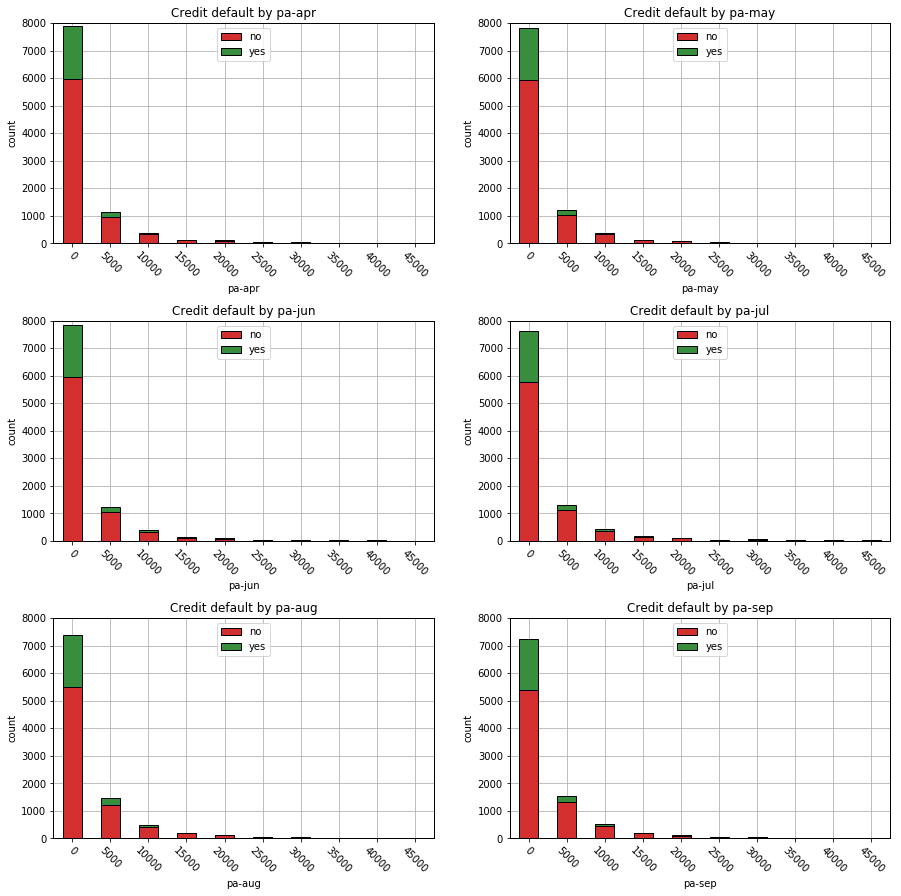

In [70]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

for i in range(0, 6):#len(pa_var)):
    x = i // fig_dims[1]
    y = i % fig_dims[1]
    sp = plt.subplot2grid(fig_dims, (x, y))
    pa_default[i].plot(ax=sp, kind='bar', stacked=True, title='Credit default by ' + pa_var[i], edgecolor='black')
    plt.ylim(top=8000)
    plt.ylabel("count")
    plt.legend(loc="upper center")
    plt.xticks(rotation=-45)

plt.subplots_adjust(hspace=0.35)
plt.show()

In [71]:
pa_default_norm = []

for i in range(0, len(pa_var)):
    pa_default_norm.append(pa_default[i].div(pa_default[i].sum(1).astype(float), axis=0) )
    
pa_default_norm[1]

credit_default,no,yes
pa-may,,
0,0.757177,0.242823
5000,0.833741,0.166259
10000,0.854545,0.145455
15000,0.877863,0.122137
20000,0.952830,0.047170
25000,0.866667,0.133333
30000,0.878788,0.121212
35000,0.962963,0.037037
40000,0.888889,0.111111


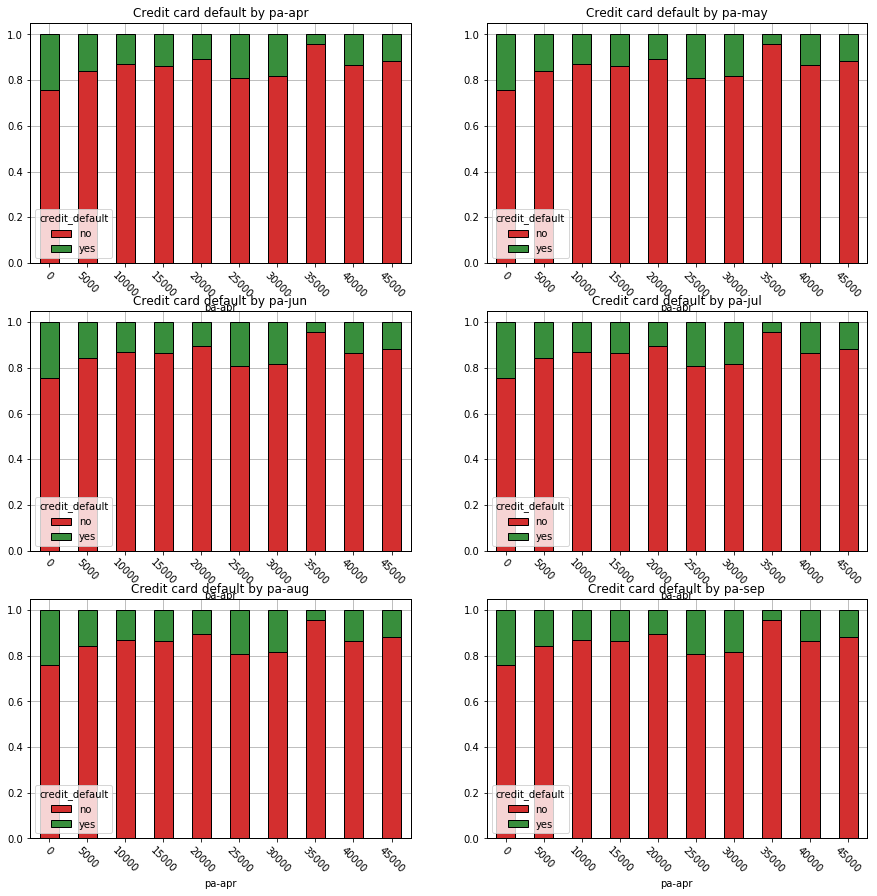

In [72]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

for i in range(0, len(pa_var)):
    x = i // fig_dims[1]
    y = i % fig_dims[1]
    sp = plt.subplot2grid(fig_dims, (x, y))
    pa_default_norm[0].plot(ax=sp, kind='bar', stacked=True, title='Credit card default by ' + pa_var[i], edgecolor='black')
    plt.xticks(rotation=-45)
    
plt.show()

Data quality
------------

In [73]:
print('Sex ' + str(cc.isnull().sum()['sex']))
print('Education ' + str(cc.isnull().sum()['education']))
print('Status ' + str(cc.isnull().sum()['status']))
print('Age ' + str(cc[cc['age'] == -1]['age'].size))

Sex 100
Education 127
Status 1822
Age 951


In [74]:
cc.describe()

,limit,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,ps-apr,ba-sep,ba-aug,ba-jul,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,167197.000000,32.020200,-0.004000,-0.127800,-0.175700,-0.234300,-0.263700,-0.297400,51490.704100,49239.438400,46957.46680,43306.114300,40182.130200,38621.582700,5651.344900,5.973676e+03,5131.898600,4719.769200,4734.702900,5480.147400
std,128975.488596,13.843119,1.132834,1.200921,1.193554,1.169333,1.147386,1.147295,73740.383345,70777.470286,68948.62697,64519.910263,60732.330157,59325.339137,15835.839092,2.251175e+04,15416.402957,14483.407778,14912.375475,19361.411204
min,10000.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,-69777.000000,-61506.00000,-24303.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,26.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3545.250000,2899.250000,2442.50000,2203.250000,1650.000000,1150.000000,997.000000,7.800000e+02,390.000000,261.500000,200.000000,100.000000
50%,140000.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22246.000000,21202.000000,19905.50000,19072.000000,18071.000000,16977.000000,2081.500000,2.000000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67681.000000,64412.750000,60164.75000,54093.750000,49906.500000,48680.750000,5019.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000
max,780000.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,613860.000000,605943.000000,597415.00000,616836.000000,587067.000000,568638.000000,493358.000000,1.227082e+06,417588.000000,292962.000000,417990.000000,528666.000000


In [75]:
cc_clean = cc.copy()

# Remove duplicate
#cc_clean = cc_clean[~cc_clean.duplicated()]

# Fix sex
cc_clean['sex'] = cc_clean['sex'].fillna("female")

# Fix education
cc_clean['education'] = cc_clean['education'].fillna("others")

# Fix status
cc_clean['status'] = cc_clean['status'].fillna("others")

# Fix age with average
mean_age = round(cc_clean[cc_clean['age']>0]['age'].mean())
cc_clean['age'] = cc_clean['age'].apply(lambda x: x if x > 0 else mean_age)

print(len(cc_clean))

cc_clean

10000


,limit,sex,education,status,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,...,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,credit_default
0,50000,male,graduate school,others,25.0,2,0,0,0,0,...,49535,30358,30302,2130,1905,1811,1100,1100,1200,no
1,200000,male,university,married,54.0,-1,-1,-1,-1,-1,...,6335,4616,7956,10120,7852,6336,4622,7956,5499,no
2,30000,female,high school,married,35.0,2,3,2,2,2,...,30496,29731,29047,0,1700,1100,3,1053,1303,no
3,140000,female,university,single,35.0,0,0,0,0,0,...,25224,26855,23783,2000,2000,900,2000,10000,5000,no
4,60000,female,high school,married,36.0,1,2,2,0,0,...,48738,49601,52773,1788,0,1894,1801,3997,0,yes
5,260000,female,university,married,44.0,1,-1,-1,-1,-1,...,1698,0,5062,1106,2527,1698,0,5062,0,no
6,50000,female,graduate school,single,29.0,3,3,2,3,2,...,49104,51044,50933,0,2800,0,3000,800,3000,yes
7,30000,female,graduate school,single,24.0,0,-1,2,-1,0,...,248,248,-150,3285,0,248,0,0,0,yes
8,10000,male,university,single,24.0,2,0,0,0,0,...,7546,9260,10000,3000,2000,3000,2000,1000,0,no
9,200000,male,university,married,55.0,1,2,2,2,2,...,191363,188683,196057,0,14000,7000,0,10000,5000,yes


In [76]:
print('Sex ' + str(cc_clean.isnull().sum()['sex']))
print('Education ' + str(cc_clean.isnull().sum()['education']))
print('Status ' + str(cc_clean.isnull().sum()['status']))
print('Age ' + str(cc_clean[cc_clean['age'] == -1]['age'].size))

Sex 0
Education 0
Status 0
Age 0


In [77]:
cont_var = ["limit","age"]+pa_var+ba_var

cc_boxplot = cc_clean[cont_var].copy()
cc_boxplot_norm = (cc_boxplot-cc_boxplot.mean())/cc_boxplot.std()

cc_boxplot_norm.head()

,limit,age,pa-apr,pa-may,pa-jun,pa-jul,pa-aug,pa-sep,ba-apr,ba-may,ba-jun,ba-jul,ba-aug,ba-sep
0,-0.908677,-1.189771,-0.221066,-0.243737,-0.249925,-0.215413,-0.180736,-0.222366,-0.140237,-0.161761,0.096542,0.055150,0.010534,-0.034238
1,0.254335,2.113946,0.000974,0.216015,-0.006750,0.078105,0.083437,0.282186,-0.516905,-0.585621,-0.573019,-0.567299,-0.554674,-0.552421
2,-1.063745,-0.050558,-0.215746,-0.246889,-0.325667,-0.261533,-0.189842,-0.356871,-0.161391,-0.172085,-0.198545,-0.242956,-0.282003,-0.290664
3,-0.210870,-0.050558,-0.024799,0.353082,-0.187785,-0.274506,-0.176516,-0.230575,-0.250122,-0.219440,-0.280256,-0.059964,-0.106283,0.066928
4,-0.831142,0.063363,-0.283045,-0.049469,-0.201525,-0.210029,-0.265358,-0.243962,0.238539,0.155088,0.084189,0.009783,-0.007396,-0.047514


Text(0.5, 1.0, 'boxplot for outlier detection')

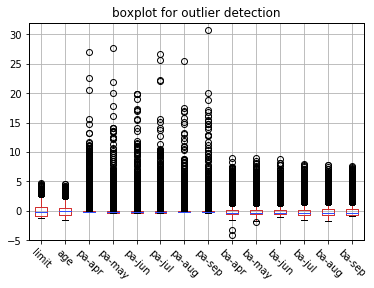

In [78]:
boxplot = cc_boxplot_norm.boxplot(column=cont_var)
plt.ylim([-5,32])
plt.xticks(rotation=-45)

plt.title("boxplot for outlier detection")

In [79]:
Q1 = cc_boxplot_norm.quantile(0.25)
Q3 = cc_boxplot_norm.quantile(0.75)
IQR = Q3 - Q1
IQR

limit     1.473148
age       1.253134
pa-apr    0.201432
pa-may    0.254822
pa-jun    0.258123
pa-jul    0.266599
pa-aug    0.187458
pa-sep    0.253981
ba-apr    0.801188
ba-may    0.794577
ba-jun    0.804256
ba-jul    0.837178
ba-aug    0.869111
ba-sep    0.869751
dtype: float64

In [80]:
((cc_boxplot_norm < (Q1 - 1.5 * IQR))).sum()

limit     0
age       0
pa-apr    0
pa-may    0
pa-jun    0
pa-jul    0
pa-aug    0
pa-sep    0
ba-apr    2
ba-may    1
ba-jun    0
ba-jul    0
ba-aug    0
ba-sep    0
dtype: int64

In [81]:
(cc_boxplot_norm > (Q3 + 1.5 * IQR)).sum()

limit      50
age       211
pa-apr    992
pa-may    951
pa-jun    969
pa-jul    862
pa-aug    890
pa-sep    920
ba-apr    907
ba-may    919
ba-jun    895
ba-jul    826
ba-aug    791
ba-sep    809
dtype: int64

In [82]:
print(cc_clean["credit_default"].size)

col_name =  ["limit", "age"]+pa_var+ba_var

def clean_out(df_in, prec1, prec2, col_name):
    q1 = cc_clean[col_name].quantile(0.25)
    q3 = cc_clean[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-prec1*iqr
    fence_high = q3+prec2*iqr
    return df_in.copy()[(((df_in[col_name] > fence_low) & (df_in[col_name] < fence_high))).all(1)]

# cc_outlier = cc_clean[(((cc_clean[col_name] > fence_low))).all(1)]

#cc_outlier = cc_clean[(((cc_clean[col_name] > fence_low) & (cc_clean[col_name] < fence_high))).all(1)]

cc_outlier = cc_clean.copy()
cc_outlier = clean_out(cc_outlier, 5, 10, pa_var)
cc_outlier = clean_out(cc_outlier, .75, 10, ba_var)
#cc_outlier = clean_out(cc_outlier, 1.5, ba_var)
#cc_outlier = clean_out(cc_outlier, 1.5, ["limit"])

print(cc_outlier["credit_default"].size)

cc_outlier.head()

10000
9121


,limit,sex,education,status,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,...,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,credit_default
0,50000,male,graduate school,others,25.0,2,0,0,0,0,...,49535,30358,30302,2130,1905,1811,1100,1100,1200,no
1,200000,male,university,married,54.0,-1,-1,-1,-1,-1,...,6335,4616,7956,10120,7852,6336,4622,7956,5499,no
2,30000,female,high school,married,35.0,2,3,2,2,2,...,30496,29731,29047,0,1700,1100,3,1053,1303,no
3,140000,female,university,single,35.0,0,0,0,0,0,...,25224,26855,23783,2000,2000,900,2000,10000,5000,no
4,60000,female,high school,married,36.0,1,2,2,0,0,...,48738,49601,52773,1788,0,1894,1801,3997,0,yes


Variables transformations
---------------------------------------

In [83]:
cc_trans = cc_outlier.copy()

cc_trans['age'] = cc_trans['age']//5*5

# Binning limit
cc_trans['limit'] = cc_trans['limit']//10000*10000

# Discretize credit_default
cc_trans['credit_default'] = cc_trans['credit_default'].apply(lambda x: 1 if x == "yes" else 0)

cc_trans['sex'] = cc_trans['sex'].apply(lambda x: 1 if x == "male" else 0)

cc_trans

,limit,sex,education,status,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,...,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,credit_default
0,50000,1,graduate school,others,25.0,2,0,0,0,0,...,49535,30358,30302,2130,1905,1811,1100,1100,1200,0
1,200000,1,university,married,50.0,-1,-1,-1,-1,-1,...,6335,4616,7956,10120,7852,6336,4622,7956,5499,0
2,30000,0,high school,married,35.0,2,3,2,2,2,...,30496,29731,29047,0,1700,1100,3,1053,1303,0
3,140000,0,university,single,35.0,0,0,0,0,0,...,25224,26855,23783,2000,2000,900,2000,10000,5000,0
4,60000,0,high school,married,35.0,1,2,2,0,0,...,48738,49601,52773,1788,0,1894,1801,3997,0,1
5,260000,0,university,married,40.0,1,-1,-1,-1,-1,...,1698,0,5062,1106,2527,1698,0,5062,0,0
6,50000,0,graduate school,single,25.0,3,3,2,3,2,...,49104,51044,50933,0,2800,0,3000,800,3000,1
7,30000,0,graduate school,single,20.0,0,-1,2,-1,0,...,248,248,-150,3285,0,248,0,0,0,1
8,10000,1,university,single,20.0,2,0,0,0,0,...,7546,9260,10000,3000,2000,3000,2000,1000,0,0
9,200000,1,university,married,55.0,1,2,2,2,2,...,191363,188683,196057,0,14000,7000,0,10000,5000,1


Correlation matrix
--------------------------

Text(0.5, 1.0, 'Correlation matrix')

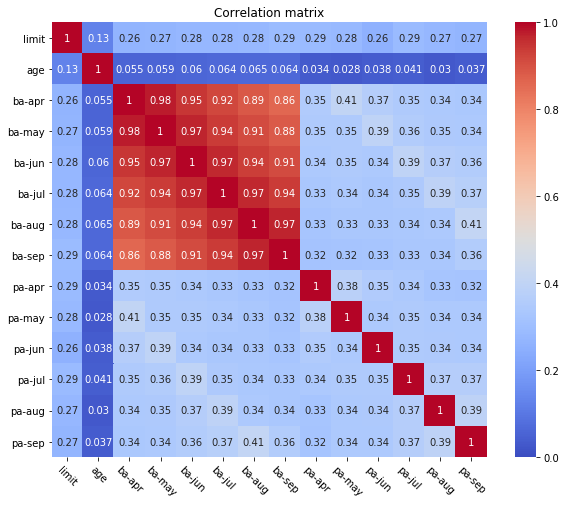

In [84]:
cont_var = ["limit","age"]+ba_var+pa_var

f, ax = plt.subplots(figsize=(10, 8))

corr = cc_trans[cont_var].corr()

g = sns.heatmap(corr, cmap="coolwarm", vmin=0, vmax=1, annot=True, mask=np.zeros_like(corr, dtype=np.bool), square=True, ax=ax, edgecolor='black')
plt.xticks(rotation=315)
plt.title("Correlation matrix")

In [85]:
ba_df = cc_trans[cont_var].copy()
ba_df = ba_df.assign(ba_mean=ba_df[ba_var].mean(axis=1))
ba_df = ba_df.assign(pa_mean=ba_df[pa_var].mean(axis=1))

ba_df = ba_df[["limit", "age"] + ba_var + ["ba_mean"] + pa_var + ["pa_mean"]]
ba_df.head()

,limit,age,ba-apr,ba-may,ba-jun,ba-jul,ba-aug,ba-sep,ba_mean,pa-apr,pa-may,pa-jun,pa-jul,pa-aug,pa-sep,pa_mean
0,50000,25.0,30302,30358,49535,50760,49985,48966,43317.666667,1200,1100,1100,1811,1905,2130,1541.000000
1,200000,50.0,7956,4616,6335,7843,9981,10755,7914.333333,5499,7956,4622,6336,7852,10120,7064.166667
2,30000,35.0,29047,29731,30496,30206,29280,30057,29802.833333,1303,1053,3,1100,1700,0,859.833333
3,140000,35.0,23783,26855,25224,42823,41717,56426,36138.000000,5000,10000,2000,900,2000,2000,3650.000000
4,60000,35.0,52773,49601,48738,47632,48716,47987,49241.166667,0,3997,1801,1894,0,1788,1580.000000


Text(0.5, 1.0, 'Correlation matrix of bill amounts')

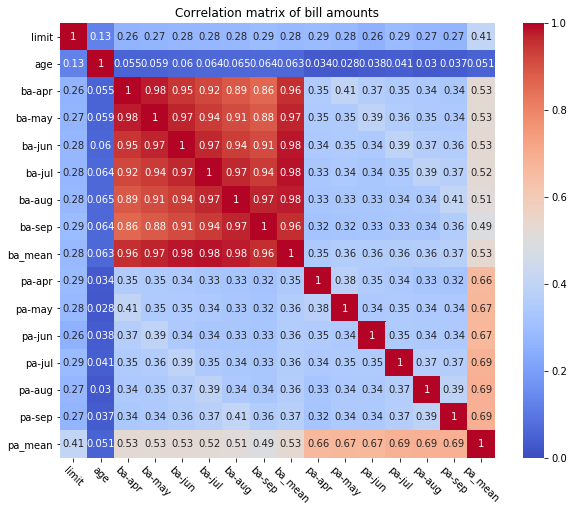

In [86]:
f, ax = plt.subplots(figsize=(10, 8))
corr = ba_df.corr()
sns.heatmap(corr, cmap="coolwarm", vmin=0, vmax=1, annot=True, mask=np.zeros_like(corr, dtype=np.bool), square=True, ax=ax)
plt.xticks(rotation=315)
plt.yticks(rotation=0)
plt.title("Correlation matrix of bill amounts")

In [87]:
cc_final = cc_trans.copy()

# Drop ba_var
cc_final = cc_final.assign(ba_mean=cc_trans[ba_var].mean(axis=1))
cc_final = cc_final.drop(columns=ba_var)

# Binning ba_mean
cc_final['ba_mean'] = cc_final['ba_mean']//10000*10000

# Drop ba_var
cc_final = cc_final.assign(pa_mean=cc_trans[pa_var].mean(axis=1))
cc_final = cc_final.drop(columns=pa_var)

# Binning ba_mean
cc_final['pa_mean'] = cc_final['pa_mean']//1000*1000

# Add index
cc_final['index'] = range(0, len(cc_final))

cc_final.describe()

,limit,sex,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,ps-apr,credit_default,ba_mean,pa_mean,index
count,9121.000000,9121.000000,9121.000000,9121.000000,9121.000000,9121.000000,9121.000000,9121.000000,9121.000000,9121.000000,9121.000000,9121.000000,9121.000000
mean,157717.355553,0.383949,33.544567,0.033220,-0.091328,-0.143186,-0.209626,-0.243833,-0.285824,0.233417,37647.187808,2775.243943,4560.000000
std,123612.330539,0.486372,8.974587,1.138777,1.217243,1.213728,1.191306,1.172029,1.175492,0.423029,60323.241726,3361.176207,2633.150236
min,10000.000000,0.000000,20.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,-20000.000000,0.000000,0.000000
25%,50000.000000,0.000000,25.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,1000.000000,2280.000000
50%,130000.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,2000.000000,4560.000000
75%,230000.000000,1.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50000.000000,4000.000000,6840.000000
max,780000.000000,1.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,1.000000,540000.000000,28000.000000,9120.000000


Clustering
==========

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
cc_final_cont = cc_final[['limit', 'ba_mean', 'pa_mean']]

scaler = MinMaxScaler()
X = scaler.fit_transform(cc_final_cont.values)

K-Means
-----------

In [90]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [91]:
sse_list = list()
silhouette_list = list()

max_k = 20
for k in range(2, max_k + 1):
    print(str(k) + " ", end="")
    kmeans = KMeans(n_clusters=k, n_init=20, max_iter=100, precompute_distances=True, random_state=42)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    silhouette = silhouette_score(X, kmeans.labels_)
    silhouette_list.append(silhouette)

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

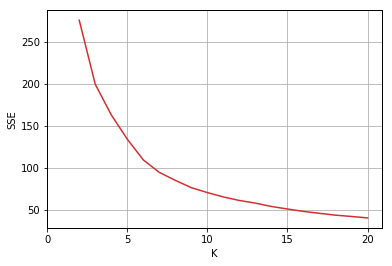

In [92]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE')
plt.xlabel('K')
plt.xticks(np.arange(0, max_k+1, 5))
plt.tick_params(axis='both', which='major')
plt.show()

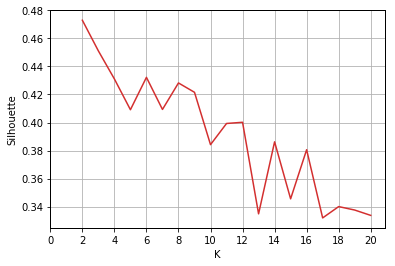

In [93]:
plt.plot(range(2, len(silhouette_list) + 2), silhouette_list)
plt.ylabel('Silhouette')
plt.xlabel('K')
plt.xticks(np.arange(0, max_k+1, 2))
plt.tick_params(axis='both', which='major')
plt.show()

In [94]:
kmeans = KMeans(n_clusters=8, n_init=10, max_iter=300, precompute_distances=True, random_state=42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances=True,
    random_state=42, tol=0.0001, verbose=0)

In [95]:
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

Silhouette 0.42821165532363215


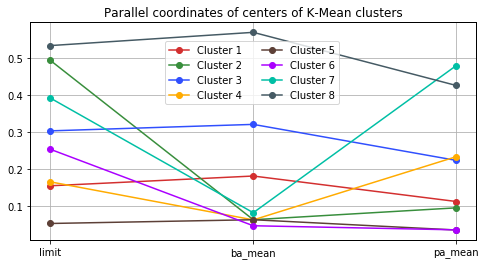

In [96]:
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % (i+1))
plt.tick_params(axis='both', which='major')
plt.xticks(range(0, len(cc_final_cont.columns)), cc_final_cont.columns)
plt.legend(ncol=2, bbox_to_anchor=(0.29, .6))
plt.title("Parallel coordinates of centers of K-Mean clusters")
plt.show()

0 1100
1 859
2 622
3 663
4 3629
5 1801
6 269
7 178


8

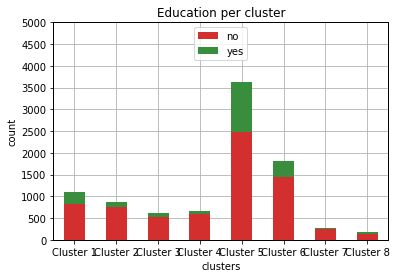

In [97]:
cluster_map = pd.DataFrame()
cluster_map['index'] = cc_final.index.values
cluster_map['cluster'] = kmeans.labels_

clusteria = []
cluster_df = pd.DataFrame()

for i in range(0, len(centers)):
    clusteri = cc_final.loc[cluster_map[cluster_map["cluster"]==i]["index"]]
    clusteria.append(clusteri)
    print(i, clusteri["credit_default"].size)
#    cluster_df["Cluster " + str(i+1)] = (clusteri["status"]).value_counts()
#    cluster_df["Cluster " + str(i+1)] = (clusteri["sex"]).map({0: "female", 1: "male"}).value_counts()
    cluster_df["Cluster " + str(i+1)] = (clusteri["credit_default"]).map({0: "no", 1: "yes"}).value_counts()

cluster_df_final = cluster_df.T

cluster_df_final.plot(kind="bar", stacked=True)

plt.xticks(rotation=0)
plt.title("Education per cluster")
plt.ylabel("count")
plt.xlabel("clusters")
plt.legend(loc="upper center")
plt.yticks(range(0, 5001, 500))

#cc_clean

len(clusteria)

In [98]:
cluster_df_final_norm = cluster_df_final.div(cluster_df_final.sum(1).astype(float), axis=0)
cluster_df_final_norm

,no,yes
Cluster 1,0.754545,0.245455
Cluster 2,0.864959,0.135041
Cluster 3,0.827974,0.172026
Cluster 4,0.879336,0.120664
Cluster 5,0.685864,0.314136
Cluster 6,0.801222,0.198778
Cluster 7,0.962825,0.037175
Cluster 8,0.730337,0.269663


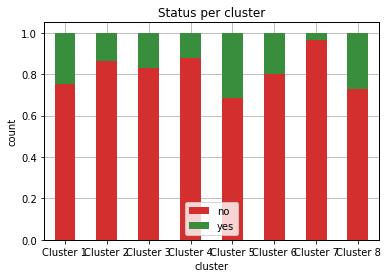

In [99]:
cluster_df_final_norm.plot(kind="bar", stacked=True)

plt.xticks(rotation=0)
plt.title("Status per cluster")
plt.ylabel("count")
plt.xlabel("cluster")
plt.legend(loc="lower center")

0 1 2 3 4 5 6 7 

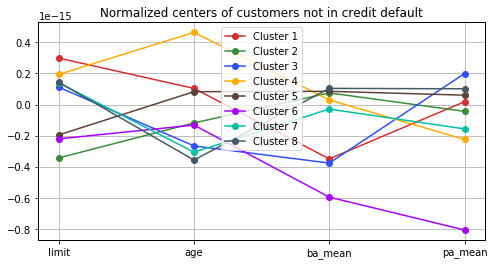

In [100]:
cont_var = ["limit", "age", "ba_mean", "pa_mean"]

plt.figure(figsize=(8, 4))

to_plot = []
for i in range(0, len(clusteria)):
    print(i, end=" ")
    val = clusteria[i][clusteria[i]["credit_default"] == 0][cont_var]
    val = val.astype(float)
    val = (val-val.mean())/val.std()
    to_plot.append(list(val.mean()))
    plt.plot(list(val.mean()), marker='o', label='Cluster %s' % (i+1))
    
plt.tick_params(axis='both', which='major')
plt.xticks(range(0, len(cont_var)), cont_var)
plt.legend(ncol=1, loc="upper center")
#plt.yticks(range(0, len(range(-3, 7))), range(-3, 7))

#plt.ylim([50, 100])

plt.title("Normalized centers of customers not in credit default")
plt.show()


val = clusteria[0][cont_var].astype(float)
val = (val-val.mean())/val.std()


0 1 2 3 4 5 6 7 

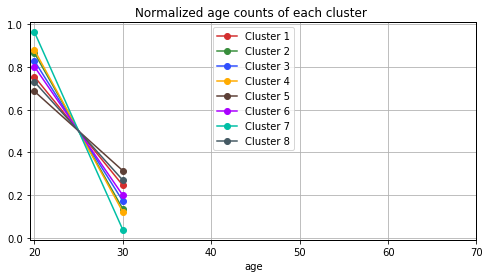

In [101]:
cont_var = ["limit", "age", "ba_mean", "pa_mean"]

plt.figure(figsize=(8, 4))

to_plot = []
for i in range(0, len(clusteria)):
    print(i, end=" ")
    plt.plot(list(cluster_df_final_norm.iloc[i]), marker='o', label='Cluster %s' % (i+1))
    
plt.tick_params(axis='both', which='major')
plt.xticks(range(0, len(range(20, 80, 10))), range(20, 80, 10))
plt.legend(ncol=1, loc="upper center")

#plt.ylim([50, 100])

plt.title("Normalized age counts of each cluster ")
plt.legend(loc="upper center")
plt.xlabel("age")
plt.ylabel("")
plt.show()


val = clusteria[0][cont_var].astype(float)
val = (val-val.mean())/val.std()



DBSCAN
-----------------------

In [102]:
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform
from sklearn import metrics

In [103]:
dist = pdist(X, 'euclidean')
dist = squareform(dist)

dist[0][:10]

array([0.        , 0.29827751, 0.05679499, 0.13813972, 0.01298701,
       0.28192589, 0.        , 0.08397738, 0.08832124, 0.36378128])

In [104]:
min_k = 2
max_k = 20

kth_distances = {}
silhouettes = [0]*(max_k+1)

for k in range(min_k,max_k+1):
    kth_distances[k] = list()

for d in dist:
    sorteds = np.argsort(d)
    for k in range(min_k, max_k+1):
        index_kth_distance = sorteds[k]
        kth_distances[k].append(d[index_kth_distance])

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

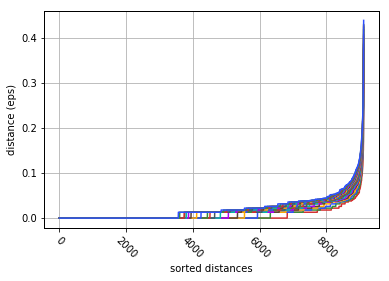

In [105]:
for k in kth_distances:
    print(str(k) + " ", end="")
    plt.plot(range(0, len(kth_distances[k])), sorted(kth_distances[k]))
    
plt.ylabel('distance (eps)')
plt.xlabel('sorted distances')
plt.xticks(rotation=-45)
plt.tick_params(axis='both', which='major')

plt.show()

In [106]:
for k in [25]:
    print(str(k) + " ", end="")
    plt.plot(range(0, len(kth_distances[k])), sorted(kth_distances[k]))
    
plt.ylabel('distance (eps)')
plt.xlabel('sorted distances')
plt.xticks(rotation=-45)
plt.axhline(y=0.05, color='blue', linestyle='-')
plt.axvline(x=8000, color='blue', linestyle='-')

plt.tick_params(axis='both', which='major')

plt.show()

25 

KeyError: 25

In [107]:
dbscan_silhouette = []

for k in range(min_k, max_k+1):
    dbscan = DBSCAN(eps=0.05, min_samples=k)
    dbscan.fit(X)
    score = silhouette_score(X, dbscan.labels_)
    print(k, " ", score)
    dbscan_silhouette.append(score)
    

2   -0.18635863349388007
3   0.33400160595272727
4   0.3444669745466921
5   0.24019872290195793
6   0.43753204033605747
7   0.4407691522010704
8   0.2656587747218909
9   0.3955214302615127
10   0.568408659374972
11   0.34134256801149665
12   0.34244682433275425
13   0.34443570126510314
14   0.5604495784487294
15   0.558123434385577
16   0.5511325867760652
17   0.4820869545413429
18   0.48229445791777886
19   0.2981839452881294
20   0.29514384895969964


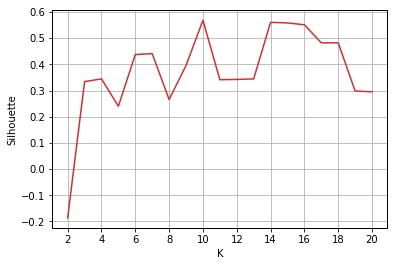

In [108]:
plt.plot(range(min_k, len(dbscan_silhouette) + 2), dbscan_silhouette)
plt.ylabel('Silhouette')
plt.xlabel('K')
plt.xticks(np.arange(min_k, max_k+1, 2))
plt.tick_params(axis='both', which='major')
plt.show()

In [109]:
for i in range(2, 30):
    dbscan = DBSCAN(eps=0.03, min_samples=i)
    db = dbscan.fit(X)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print('Estimated number of clusters: [%d] %d' % (i, n_clusters_))
    #print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: [2] 173
Estimated number of clusters: [3] 99
Estimated number of clusters: [4] 74
Estimated number of clusters: [5] 69
Estimated number of clusters: [6] 54
Estimated number of clusters: [7] 38
Estimated number of clusters: [8] 33
Estimated number of clusters: [9] 28
Estimated number of clusters: [10] 22
Estimated number of clusters: [11] 20
Estimated number of clusters: [12] 18
Estimated number of clusters: [13] 21
Estimated number of clusters: [14] 19
Estimated number of clusters: [15] 17
Estimated number of clusters: [16] 16
Estimated number of clusters: [17] 17
Estimated number of clusters: [18] 19
Estimated number of clusters: [19] 19
Estimated number of clusters: [20] 19
Estimated number of clusters: [21] 22
Estimated number of clusters: [22] 18
Estimated number of clusters: [23] 18
Estimated number of clusters: [24] 17
Estimated number of clusters: [25] 16
Estimated number of clusters: [26] 16
Estimated number of clusters: [27] 15
Estimated number of

Estimated number of clusters: 14
Estimated number of noise points: 2502


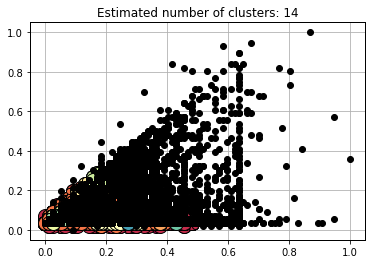

In [110]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [111]:
for i in range(2, 40):
    dbscan = DBSCAN(eps=0.0357, min_samples=i)
    db = dbscan.fit(X)

    sizes = {}

    for x in db.labels_:
        if x not in sizes:
            sizes[x] = 0
        sizes[x] += 1

    print(i, sizes)

2 {0: 2214, 1: 116, 2: 2211, 3: 818, 4: 117, 5: 6, 6: 586, 7: 2, 8: 5, -1: 348, 9: 1190, 10: 176, 11: 95, 12: 487, 13: 14, 14: 6, 15: 7, 16: 2, 17: 7, 18: 2, 19: 6, 20: 25, 21: 13, 22: 3, 23: 23, 24: 2, 25: 11, 26: 34, 27: 16, 28: 6, 29: 2, 30: 3, 31: 15, 32: 11, 33: 35, 34: 4, 35: 7, 36: 8, 37: 3, 38: 8, 39: 6, 40: 3, 41: 3, 42: 2, 43: 4, 44: 11, 45: 2, 46: 5, 47: 13, 48: 2, 49: 2, 50: 33, 51: 4, 52: 2, 53: 20, 54: 5, 55: 2, 56: 2, 57: 3, 58: 5, 59: 11, 60: 7, 61: 10, 62: 4, 63: 3, 64: 2, 65: 2, 66: 2, 67: 21, 68: 2, 69: 2, 70: 9, 71: 7, 72: 3, 73: 6, 74: 6, 75: 5, 76: 2, 77: 8, 78: 2, 79: 3, 80: 2, 81: 17, 82: 2, 83: 7, 84: 19, 85: 4, 86: 5, 87: 6, 88: 2, 89: 6, 90: 4, 91: 2, 92: 6, 93: 2, 94: 2, 95: 2, 96: 2, 97: 4, 98: 6, 99: 2, 100: 3, 101: 5, 102: 5, 103: 4, 104: 3, 105: 4, 106: 2, 107: 7, 108: 4, 109: 2, 110: 2, 111: 2, 112: 4, 113: 2, 114: 3, 115: 2, 116: 3, 117: 2, 118: 2, 119: 3, 120: 2, 121: 2, 122: 2, 123: 2, 124: 2, 125: 3, 126: 2, 127: 2, 128: 2, 129: 3, 130: 4, 131: 2, 1

In [112]:
dbscan = DBSCAN(eps=0.05, min_samples=24)
db = dbscan.fit(X)

cluster = {}
for i in range(0, len(db.labels_)):
    x = db.labels_[i]
    if x not in cluster:
        cluster[x] = []
    cluster[x].append(i)
    

cc_final.iloc[cluster[1]]

,limit,sex,education,status,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,ps-apr,credit_default,ba_mean,pa_mean,index
78,280000,1,graduate school,others,45.0,-1,-1,-1,-1,-1,-1,1,10000.0,12000.0,72
429,290000,1,graduate school,single,40.0,-2,-2,-2,-2,-2,-2,0,10000.0,12000.0,385
1080,300000,1,graduate school,others,45.0,-1,-1,-1,-1,-1,-1,0,10000.0,12000.0,983
1093,250000,0,graduate school,single,35.0,2,-1,-1,-1,-1,0,1,10000.0,11000.0,994
1238,310000,1,graduate school,single,30.0,0,0,0,0,0,-1,0,10000.0,11000.0,1127
1648,300000,0,graduate school,others,35.0,-1,-1,-1,-1,-1,-1,0,10000.0,10000.0,1512
2388,250000,1,university,single,35.0,-1,-1,-1,-1,-1,-1,0,10000.0,11000.0,2183
2572,270000,0,graduate school,single,25.0,-1,-1,-1,0,0,0,0,10000.0,10000.0,2351
2895,280000,0,high school,single,35.0,-1,-1,-1,-1,0,0,0,10000.0,10000.0,2646
3502,290000,0,graduate school,single,35.0,-1,-1,-1,0,0,0,0,10000.0,12000.0,3199


Hierarchical clustering
----------------------

In [113]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, ward

['(16)',
 '(7)',
 '2588',
 '(56)',
 '(63)',
 '(58)',
 '(49)',
 '(103)',
 '(113)',
 '(431)',
 '(615)',
 '(157)',
 '(856)',
 '(966)',
 '(4905)',
 '(260)',
 '(41)',
 '(231)',
 '(3)',
 '(2)',
 '(57)',
 '(12)',
 '(7)',
 '(2)',
 '(10)',
 '(7)',
 '(32)',
 '(8)',
 '(7)',
 '(46)']

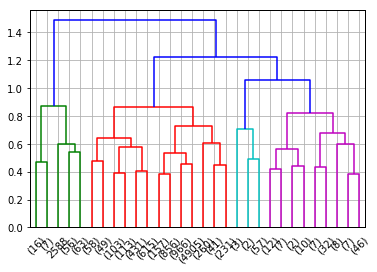

In [114]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

res["ivl"]

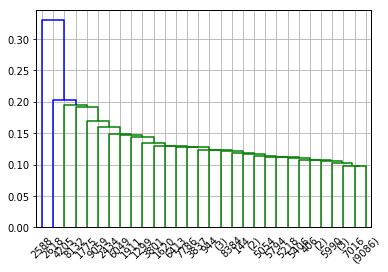

In [115]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')

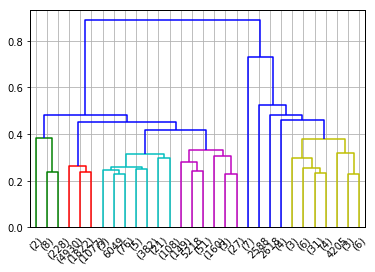

In [116]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp')

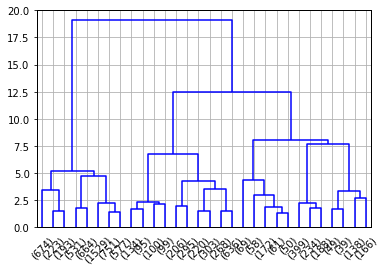

In [117]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp')

Associative rules
===================

In [118]:
from fim import apriori

In [119]:
cc_final.head()

,limit,sex,education,status,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,ps-apr,credit_default,ba_mean,pa_mean,index
0,50000,1,graduate school,others,25.0,2,0,0,0,0,0,0,40000.0,1000.0,0
1,200000,1,university,married,50.0,-1,-1,-1,-1,-1,-1,0,0.0,7000.0,1
2,30000,0,high school,married,35.0,2,3,2,2,2,0,0,20000.0,0.0,2
3,140000,0,university,single,35.0,0,0,0,0,0,0,0,30000.0,3000.0,3
4,60000,0,high school,married,35.0,1,2,2,0,0,0,1,40000.0,1000.0,4


In [120]:
cc_basket = cc_final.copy()

cc_basket.drop(["index"], axis=1, inplace=True)

cc_basket["limit"] = cc_basket["limit"] // 10000
cc_basket["ba_mean"] = cc_basket["ba_mean"] // 10000
cc_basket["pa_mean"] = cc_basket["pa_mean"] // 1000

cc_basket["sex"] = cc_basket["sex"].map({0: "female", 1: "male"}).astype(str)

cc_basket["age"] = cc_basket["age"]//10*10

cc_basket["credit_default"] = cc_basket["credit_default"].map({0: "no_default", 1: "yes_default"}).astype(str)

for col in [ ["limit", "age", "ba_mean", "pa_mean"] + ps_var ]:
    cc_basket[col] = cc_basket[col].astype(str) + "_" + col

cc_basket.head()

,limit,sex,education,status,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,ps-apr,credit_default,ba_mean,pa_mean
0,5_limit,male,graduate school,others,20.0_age,2_ps-sep,0_ps-aug,0_ps-jul,0_ps-jun,0_ps-may,0_ps-apr,no_default,4.0_ba_mean,1.0_pa_mean
1,20_limit,male,university,married,50.0_age,-1_ps-sep,-1_ps-aug,-1_ps-jul,-1_ps-jun,-1_ps-may,-1_ps-apr,no_default,-0.0_ba_mean,7.0_pa_mean
2,3_limit,female,high school,married,30.0_age,2_ps-sep,3_ps-aug,2_ps-jul,2_ps-jun,2_ps-may,0_ps-apr,no_default,2.0_ba_mean,-0.0_pa_mean
3,14_limit,female,university,single,30.0_age,0_ps-sep,0_ps-aug,0_ps-jul,0_ps-jun,0_ps-may,0_ps-apr,no_default,3.0_ba_mean,3.0_pa_mean
4,6_limit,female,high school,married,30.0_age,1_ps-sep,2_ps-aug,2_ps-jul,0_ps-jun,0_ps-may,0_ps-apr,yes_default,4.0_ba_mean,1.0_pa_mean


In [121]:
baskets = cc_basket.values.tolist()
baskets[0]

['5_limit',
 'male',
 'graduate school',
 'others',
 '20.0_age',
 '2_ps-sep',
 '0_ps-aug',
 '0_ps-jul',
 '0_ps-jun',
 '0_ps-may',
 '0_ps-apr',
 'no_default',
 '4.0_ba_mean',
 '1.0_pa_mean']

In [122]:
itemsets = apriori(baskets, supp=20, zmin=2, target='a') 

print("Itemsets: " + str(len(itemsets)))
dim = cc_basket['sex'].size

for i in range(0, len(itemsets)):
    itemsets[i] = list(reversed(itemsets[i]))
    itemsets[i][0] *= 100/dim
    itemsets[i][0] = int(itemsets[i][0]*100)/100
    
itemsets = list(reversed(sorted(itemsets)))

nocount = 0
yescount = 0
for r in itemsets:
    if "no_default" in r[1]:
        print(r)

        

Itemsets: 335
[48.44, ('female', 'no_default')]
[44.81, ('0_ps-may', 'no_default')]
[44.26, ('0_ps-jun', 'no_default')]
[43.99, ('0_ps-aug', 'no_default')]
[43.25, ('0_ps-apr', 'no_default')]
[43.19, ('0_ps-jul', 'no_default')]
[42.47, ('0_ps-sep', 'no_default')]
[41.47, ('0_ps-sep', '0_ps-aug', 'no_default')]
[40.39, ('0_ps-jun', '0_ps-may', 'no_default')]
[39.84, ('0_ps-aug', '0_ps-jul', 'no_default')]
[39.83, ('0_ps-apr', '0_ps-may', 'no_default')]
[39.73, ('0_ps-jul', '0_ps-jun', 'no_default')]
[38.43, ('0_ps-aug', '0_ps-jun', 'no_default')]
[37.84, ('0_ps-sep', '0_ps-jul', 'no_default')]
[37.74, ('0_ps-apr', '0_ps-jun', 'no_default')]
[37.71, ('0_ps-jul', '0_ps-may', 'no_default')]
[37.6, ('0_ps-sep', '0_ps-aug', '0_ps-jul', 'no_default')]
[37.33, ('0_ps-aug', '0_ps-may', 'no_default')]
[36.82, ('0_ps-sep', '0_ps-jun', 'no_default')]
[36.64, ('0_ps-aug', '0_ps-jul', '0_ps-jun', 'no_default')]
[36.56, ('0_ps-jul', '0_ps-jun', '0_ps-may', 'no_default')]
[36.47, ('0_ps-apr', '0_ps-ju

In [123]:
rules = apriori(baskets, supp=2, zmin=1, target='r', conf=80, report='ascl') 

print("Rules: " + str(len(rules)))

for r in rules:
    if "no_default" not in r[0] and "no_default" not in r[1] and "ps" not in r[0] and "mean" not in r[0]:
        print(r)

Rules: 92895
('female', ('20.0_age', 'married', 'university'), 203, 0.022256331542594012, 0.8087649402390438, 1.3128216800000567)
('female', ('20.0_age', 'married', '0_ps-sep', '0_ps-aug'), 163, 0.017870847494792237, 0.806930693069307, 1.3098442519105087)
('female', ('20.0_age', 'married', '0_ps-sep'), 167, 0.018309395899572416, 0.8106796116504854, 1.3159296561423879)
('female', ('20.0_age', 'married', '0_ps-aug', '0_ps-jul'), 169, 0.018528670101962505, 0.8203883495145631, 1.3316892927428956)
('female', ('20.0_age', 'married', '0_ps-aug', '0_ps-jun'), 152, 0.01666483938164675, 0.8172043010752689, 1.3265208097717613)
('female', ('20.0_age', 'married', '0_ps-aug'), 184, 0.02017322661988817, 0.8141592920353983, 1.3215780214726582)
('female', ('20.0_age', 'married', '0_ps-jul', '0_ps-jun', '0_ps-may'), 151, 0.016555202280451705, 0.8162162162162162, 1.3249169083659207)
('female', ('20.0_age', 'married', '0_ps-jul', '0_ps-jun'), 169, 0.018528670101962505, 0.824390243902439, 1.338185338073348

In [124]:
df = cc_final
df = df[df["ps-apr"] == 0]
df = df[df["ps-may"] == 0]
#df = df[df["ps-jun"] == 0]
#df = df[df["ps-jul"] == 0]
#df = df[df["ps-aug"] == 0]

pred = (cc_final["sex"]==0)
real = cc_final["age"]
sex = cc_final["sex"]
ok = 0
no = 0

for i in range(0, df["index"].size):
#    print(pred.iloc[0], " ",(real.iloc[0]==0))
    if df["ps-jun"].iloc[i] == 0 and df["ps-jul"].iloc[i] == 0 and df["ps-aug"].iloc[i] == 0 and df["ps-sep"].iloc[i] == 0:
        ok += 1
    else:
        no += 1

print(ok, " ", no)
print(ok/(ok+no)*100, " ", no/(ok+no)*100)
print("support ", (ok+no)*100/9121, "%")



3066   1403
68.60595211456702   31.394047885432986
support  48.99682052406534 %


Classification
===========


In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

cc_final.head()

,limit,sex,education,status,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,ps-apr,credit_default,ba_mean,pa_mean,index
0,50000,1,graduate school,others,25.0,2,0,0,0,0,0,0,40000.0,1000.0,0
1,200000,1,university,married,50.0,-1,-1,-1,-1,-1,-1,0,0.0,7000.0,1
2,30000,0,high school,married,35.0,2,3,2,2,2,0,0,20000.0,0.0,2
3,140000,0,university,single,35.0,0,0,0,0,0,0,0,30000.0,3000.0,3
4,60000,0,high school,married,35.0,1,2,2,0,0,0,1,40000.0,1000.0,4


In [126]:
cont = ["limit", "sex", "age", "ba_mean", "pa_mean", "credit_default"] + ps_var

cc_classification = cc_final.copy()
cc_classification = cc_classification[cont].astype(float)

attributes = [col for col in cc_classification.columns if col != 'credit_default']
X = cc_classification[attributes].values
y = cc_classification['credit_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=100, 
                                                    stratify=y)

cc_classification.head()

,limit,sex,age,ba_mean,pa_mean,credit_default,ps-apr,ps-may,ps-jun,ps-jul,ps-aug,ps-sep
0,50000.0,1.0,25.0,40000.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,200000.0,1.0,50.0,0.0,7000.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,30000.0,0.0,35.0,20000.0,0.0,0.0,0.0,2.0,2.0,2.0,3.0,2.0
3,140000.0,0.0,35.0,30000.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60000.0,0.0,35.0,40000.0,1000.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0


In [127]:
X_train.shape, X_test.shape

((6384, 11), (2737, 11))

In [128]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [129]:
for col, imp in zip(attributes, clf.feature_importances_):
    print(col, imp)

limit 0.21977727569417463
sex 0.050975974620321926
age 0.14595637482201587
ba_mean 0.10825964406739362
pa_mean 0.07648638418002524
ps-apr 0.03973604396666951
ps-may 0.03250475874974803
ps-jun 0.047204860580091865
ps-jul 0.03201698822927033
ps-aug 0.0533628514512828
ps-sep 0.1937188436390063


In [130]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [131]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes, 
                                class_names=clf.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

TypeError: can only concatenate str (not "numpy.float64") to str

In [132]:
y_pred = clf.predict(X_train)

In [133]:
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))

Accuracy 0.9776002506265664
F1-score [0.9855745  0.94991243]


In [134]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      4894
         1.0       0.99      0.91      0.95      1490

   micro avg       0.98      0.98      0.98      6384
   macro avg       0.98      0.95      0.97      6384
weighted avg       0.98      0.98      0.98      6384



In [135]:
confusion_matrix(y_train, y_pred)

array([[4885,    9],
       [ 134, 1356]])

In [136]:
y_pred = clf.predict(X_test)

In [137]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.7278041651443186
F1-score [0.82249226 0.41660141]
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82      2098
         1.0       0.42      0.42      0.42       639

   micro avg       0.73      0.73      0.73      2737
   macro avg       0.62      0.62      0.62      2737
weighted avg       0.73      0.73      0.73      2737



array([[1726,  372],
       [ 373,  266]])

In [138]:
from sklearn.preprocessing import LabelBinarizer

In [139]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

[0.0, 1.0]

In [140]:
fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_test)
by_pred = lb.transform(y_pred)
for i in range(0, 1):
    fpr[i], tpr[i], _ = roc_curve(by_test[:, i], by_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

0.6194818524535626

In [141]:
plt.figure(figsize=(8, 5))
for i in range(0, 1):
    plt.plot(fpr[i], tpr[i], label='%s ROC curve (area = %0.2f)' % (lb.classes_.tolist()[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

IndexError: invalid index to scalar variable.

<Figure size 576x360 with 0 Axes>

Random forest classifier
-----------------------------------------

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [220]:
attributes = [col for col in cc_final.columns if col != 'credit_default' and col != 'index']

X = cc_final[attributes].copy()

X["education"] = X["education"].map({"others": -1, "high school": 0, "university": 1, "graduate school":2})
X["status"] = X["status"].map({"others": -1, "single": 0, "married": 1})

X = X.values

y = cc_final['credit_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=100, 
                                                    stratify=y)


In [168]:
import warnings
warnings.filterwarnings('ignore')

bootstrap = True
n_estimators = 100

accu = []
count = 0

print("LEN", len(X[0]))

for max_depth in range(10, len(X[0])):
    for max_features in range(1, 2):
        for min_samples_split in [0.1, 0.01, 0.001]:
            for min_samples_leaf in [0.05, 0.005, 0.0005]:
                for criterion in ["gini", "entropy"]:
                    for class_weight in ["balanced", None]:
                        clf = RandomForestClassifier(
                            n_estimators=n_estimators, 
                            bootstrap = bootstrap,
                            max_depth = max_depth,
#                            max_features = max_features,
                            min_samples_split = min_samples_split,
                            min_samples_leaf = min_samples_leaf,
                            criterion = criterion, 
                            class_weight = class_weight
                        )
                        #print("=====================================================")
                        #print(clf)
                        
                        scores = cross_val_score(clf, X, y, cv=10, n_jobs=7)
                        count += 1
                        print('[%d] Accuracy: %0.4f (+/- %0.2f)' % (count, scores.mean(), scores.std() * 2))
                        accu.append( [scores.mean(), scores.std() * 2, max_depth,max_features,min_samples_split,min_samples_leaf,criterion, class_weight])
                        
                        #scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
                        #print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
                        
accu = list(reversed(sorted(accu)))
accu[:10]

LEN 13
[1] Accuracy: 0.7652 (+/- 0.02)
[2] Accuracy: 0.7928 (+/- 0.02)
[3] Accuracy: 0.7666 (+/- 0.03)
[4] Accuracy: 0.7938 (+/- 0.02)
[5] Accuracy: 0.7520 (+/- 0.03)
[6] Accuracy: 0.8120 (+/- 0.02)
[7] Accuracy: 0.7561 (+/- 0.03)
[8] Accuracy: 0.8121 (+/- 0.02)
[9] Accuracy: 0.7528 (+/- 0.03)
[10] Accuracy: 0.8135 (+/- 0.02)
[11] Accuracy: 0.7576 (+/- 0.03)
[12] Accuracy: 0.8130 (+/- 0.02)
[13] Accuracy: 0.7668 (+/- 0.03)
[14] Accuracy: 0.7926 (+/- 0.01)
[15] Accuracy: 0.7672 (+/- 0.02)
[16] Accuracy: 0.7915 (+/- 0.01)
[17] Accuracy: 0.7698 (+/- 0.02)
[18] Accuracy: 0.8135 (+/- 0.02)
[19] Accuracy: 0.7711 (+/- 0.03)
[20] Accuracy: 0.8132 (+/- 0.02)
[21] Accuracy: 0.7751 (+/- 0.03)
[22] Accuracy: 0.8133 (+/- 0.02)
[23] Accuracy: 0.7779 (+/- 0.02)
[24] Accuracy: 0.8134 (+/- 0.02)
[25] Accuracy: 0.7668 (+/- 0.02)
[26] Accuracy: 0.7936 (+/- 0.02)
[27] Accuracy: 0.7671 (+/- 0.02)
[28] Accuracy: 0.7918 (+/- 0.01)
[29] Accuracy: 0.7716 (+/- 0.03)
[30] Accuracy: 0.8141 (+/- 0.02)
[31] Accurac

[[0.8148224010174703,
  0.021062559832876745,
  12,
  1,
  0.01,
  0.005,
  'entropy',
  None],
 [0.8146032228694715, 0.0196408373929049, 11, 1, 0.01, 0.0005, 'gini', None],
 [0.8143850068207008,
  0.019979067142727215,
  12,
  1,
  0.001,
  0.005,
  'entropy',
  None],
 [0.8141658281453801, 0.021665493814465923, 12, 1, 0.1, 0.005, 'gini', None],
 [0.8140560589249576, 0.020946735349391347, 11, 1, 0.1, 0.0005, 'gini', None],
 [0.8140552174506672, 0.02131936461060637, 11, 1, 0.001, 0.005, 'gini', None],
 [0.8140548574214821, 0.022854616923956576, 10, 1, 0.001, 0.005, 'gini', None],
 [0.8140538961132371,
  0.017423829124668968,
  12,
  1,
  0.001,
  0.0005,
  'gini',
  None],
 [0.8139461690795979,
  0.01822839095852864,
  11,
  1,
  0.001,
  0.005,
  'entropy',
  None],
 [0.8138360395663294,
  0.019118393185827965,
  12,
  1,
  0.01,
  0.0005,
  'entropy',
  None]]

In [228]:
clf1 = RandomForestClassifier(
                            n_estimators=n_estimators, 
                            bootstrap = bootstrap,
                            max_depth = 12,
                            max_features = 1,
                            min_samples_split = 0.01,
                            min_samples_leaf = 0.005,
                            criterion = 'entropy', 
                            class_weight = None
                        )
clf1.fit(X, y)

features = []

for i in range(0, len(attributes)):
    features.append([clf1.feature_importances_[i]*100, attributes[i]])
    
scores = cross_val_score(clf, X, y, cv=10, n_jobs=7)

print(clf1)

print(scores.mean())

print(scores.std()*2)


list(reversed(sorted(features)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.005, min_samples_split=0.01,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.8118624759807405
0.017640214037691247


[[25.553148787319387, 'ps-sep'],
 [17.964943203629062, 'ps-aug'],
 [11.096262632113879, 'ps-jul'],
 [9.69536922412917, 'ps-jun'],
 [8.529198690913658, 'ps-apr'],
 [6.961071910268809, 'limit'],
 [6.8096721885417875, 'pa_mean'],
 [6.333521246120666, 'ps-may'],
 [2.4347165950669845, 'ba_mean'],
 [1.7073965638109971, 'age'],
 [1.2638030068361934, 'education'],
 [0.8730933208084029, 'sex'],
 [0.7778026304410114, 'status']]

In [232]:
y_pred = clf1.predict(X_test)
y_pred_tr = clf1.predict(X_train)

print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Train Accuracy 0.7987155388471178
Train F1-score [0.88063168 0.35846231]

Test Accuracy 0.7986846912678115
Test F1-score [0.88013922 0.37172178]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      2098
           1       0.68      0.26      0.37       639

   micro avg       0.80      0.80      0.80      2737
   macro avg       0.75      0.61      0.63      2737
weighted avg       0.78      0.80      0.76      2737



array([[2023,   75],
       [ 476,  163]])

In [233]:
clf2 = RandomForestClassifier(
                            n_estimators=n_estimators, 
                            bootstrap = bootstrap,
                            max_depth = 11,
                            max_features = 1,
                            min_samples_split = 0.01,
                            min_samples_leaf = 0.0005,
                            criterion = 'gini', 
                            class_weight = None
                        )

clf2.fit(X, y)
features = []
for i in range(0, len(attributes)):
    features.append([clf2.feature_importances_[i]*100, attributes[i]])
    
list(reversed(sorted(features)))

[[28.539852953031208, 'ps-sep'],
 [16.621990662742757, 'ps-aug'],
 [9.33301424952229, 'ps-jul'],
 [9.099204496136176, 'ps-jun'],
 [8.850690822432318, 'ps-may'],
 [8.644152461797603, 'ps-apr'],
 [5.781476320807828, 'limit'],
 [5.038003738208325, 'pa_mean'],
 [2.5638067129090762, 'ba_mean'],
 [2.140186863026335, 'age'],
 [1.4032992378385574, 'education'],
 [1.0119952365778981, 'status'],
 [0.9723262449696228, 'sex']]

In [234]:
y_pred = clf2.predict(X_test)
y_pred_tr = clf2.predict(X_train)

print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Train Accuracy 0.8085839598997494
Train F1-score [0.88515038 0.42575188]

Test Accuracy 0.8125685056631348
Test F1-score [0.88697951 0.4513369 ]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      2098
           1       0.71      0.33      0.45       639

   micro avg       0.81      0.81      0.81      2737
   macro avg       0.77      0.64      0.67      2737
weighted avg       0.80      0.81      0.79      2737



array([[2013,   85],
       [ 428,  211]])

In [272]:
clf3 = RandomForestClassifier(
                            n_estimators=n_estimators, 
                            bootstrap = bootstrap,
                            max_depth = 5,
                            max_features = None,
                            min_samples_split = 0.0001,
                            min_samples_leaf = 0.0005,
                            criterion = 'gini', 
                            class_weight = None
                        )

clf3.fit(X, y)
features = []
for i in range(0, len(attributes)):
    features.append([clf3.feature_importances_[i]*100, attributes[i]])
    
list(reversed(sorted(features)))

[[65.14894865568569, 'ps-sep'],
 [12.703605438248896, 'ps-aug'],
 [4.732588241752021, 'pa_mean'],
 [4.119864491979611, 'ps-jun'],
 [3.3612405108351306, 'limit'],
 [2.2984019398376048, 'ps-jul'],
 [1.6588755006470497, 'ps-apr'],
 [1.473290843376202, 'age'],
 [1.4705076485157185, 'ps-may'],
 [1.2060407964229904, 'ba_mean'],
 [0.9261399943562247, 'education'],
 [0.5398640935427175, 'status'],
 [0.3606318448001463, 'sex']]

In [273]:
y_pred = clf3.predict(X_test)
y_pred_tr = clf3.predict(X_train)

print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Train Accuracy 0.8223684210526315
Train F1-score [0.891587   0.50866551]

Test Accuracy 0.8227986846912678
Test F1-score [0.89123122 0.52216749]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2098
           1       0.70      0.41      0.52       639

   micro avg       0.82      0.82      0.82      2737
   macro avg       0.77      0.68      0.71      2737
weighted avg       0.81      0.82      0.81      2737



array([[1987,  111],
       [ 374,  265]])

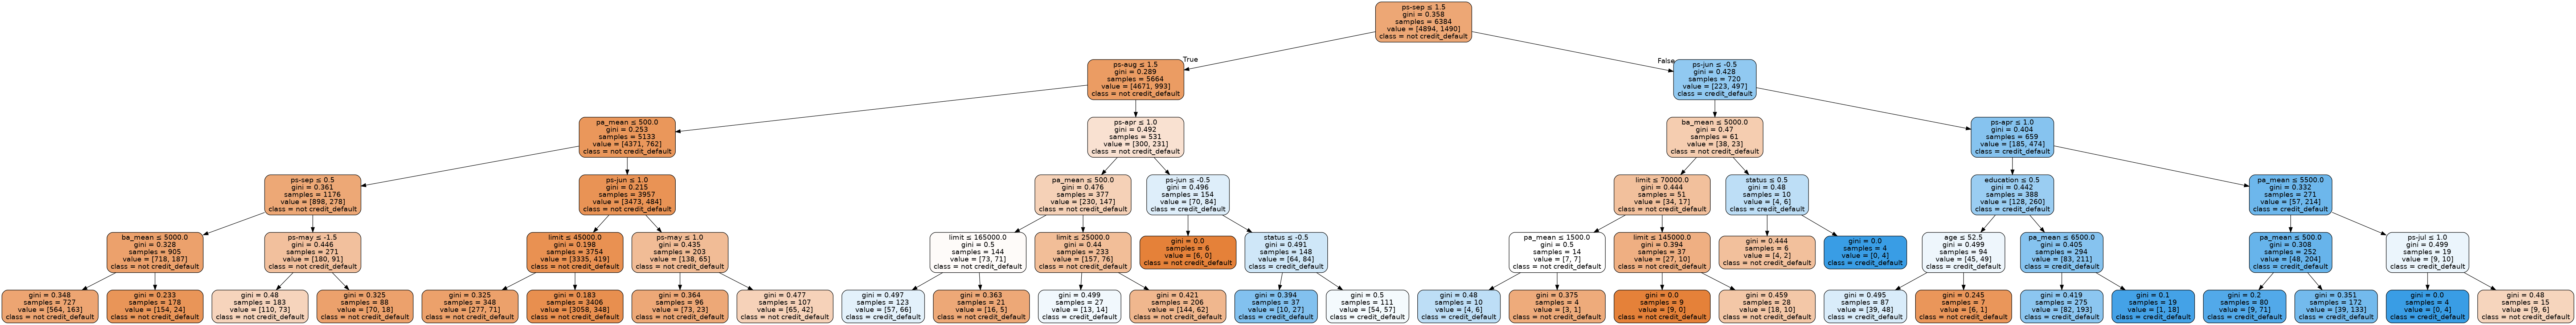

In [293]:
from sklearn.tree import export_graphviz

clf3.estimators_[1].fit(X_train, y_train)

dot_data = tree.export_graphviz(clf3.estimators_[1], out_file=None,  
                feature_names = attributes,
                class_names=['credit_default' if x == 1 else 'not credit_default' for x in clf3.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

Predict
----------------

In [180]:
cc_test = pd.read_csv("../dataset/credit_default_test.csv")
cc_test.head()

,index,limit,sex,education,status,age,ps-sep,ps-aug,ps-jul,ps-jun,...,ba-jul,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr
0,0,60000,female,high school,married,34,0,0,0,0,...,29306,27800,27552,29545,1778,2000,1748,1500,2600,1000
1,1,20000,male,university,married,43,0,0,0,0,...,14870,16116,16436,16781,1600,1300,1500,588,610,611
2,2,20000,male,high school,single,23,1,2,-1,-1,...,572,19206,18595,19135,0,572,20502,1000,840,705
3,3,360000,female,graduate school,single,28,-2,-2,-2,-2,...,0,0,0,0,2500,0,0,0,0,0
4,4,330000,female,graduate school,married,36,-1,-1,2,-1,...,36,24699,2912,14231,36,0,24863,2912,14231,6976


In [194]:
cc_test_trans = cc_test.copy()

cc_test_trans = cc_test_trans.assign(ba_mean=cc_test_trans[ba_var].mean(axis=1))
cc_test_trans = cc_test_trans.assign(pa_mean=cc_test_trans[pa_var].mean(axis=1))

cc_test_trans['education'] = cc_test_trans['education'].fillna('others')
cc_test_trans['status'] = cc_test_trans['status'].fillna('others')

cc_test_trans['age']     = cc_test_trans['age']//5*5
cc_test_trans['limit']   = cc_test_trans['limit']//10000*10000
cc_test_trans['ba_mean'] = cc_test_trans['ba_mean']//10000*10000
cc_test_trans['pa_mean'] = cc_test_trans['pa_mean']//1000*1000

cc_test_trans['sex'] = cc_test_trans['sex'].apply(lambda x: 1 if x == "male" else 0)
cc_test_trans["education"] = cc_test_trans["education"].map({"others": -1, "high school": 0, "university": 1, "graduate school":2})
cc_test_trans["status"] = cc_test_trans["status"].map({"others": -1, "single": 0, "married": 1})

cc_test_trans['index'] = range(0, len(cc_test_trans))


cc_test_trans.isna().sum()

index        0
limit        0
sex          0
education    0
status       0
age          0
ps-sep       0
ps-aug       0
ps-jul       0
ps-jun       0
ps-may       0
ps-apr       0
ba-sep       0
ba-aug       0
ba-jul       0
ba-jun       0
ba-may       0
ba-apr       0
pa-sep       0
pa-aug       0
pa-jul       0
pa-jun       0
pa-may       0
pa-apr       0
ba_mean      0
pa_mean      0
dtype: int64

In [213]:
X_test = cc_test_trans[attributes].values

y_pred_tr1 = clf1.predict(X_test)

In [215]:
f = open("../dataset/submission1.csv", "w")

f.write("index,credit_default\n")

for i in range(0, len(y_pred_tr1)):
    f.write(str(i) + "," + ("yes" if y_pred_tr1[i] == 1 else "no") + "\n")
f.close()

In [216]:
X_test = cc_test_trans[attributes].values

y_pred_tr2 = clf2.predict(X_test)

In [218]:
f = open("../dataset/submission2.csv", "w")

f.write("index,credit_default\n")

for i in range(0, len(y_pred_tr2)):
    f.write(str(i) + "," + ("yes" if y_pred_tr2[i] == 1 else "no") + "\n")
f.close()

In [277]:
X_test = cc_test_trans[attributes].values

y_pred_tr3 = clf3.predict(X_test)

In [278]:
f = open("../dataset/submission3.csv", "w")

f.write("index,credit_default\n")

for i in range(0, len(y_pred_tr3)):
    f.write(str(i) + "," + ("yes" if y_pred_tr3[i] == 1 else "no") + "\n")
f.close()